In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import lightkurve as lk

# compare accuracy across tests

In [32]:
for i in range(1,8):
    acc = acc = pd.read_csv('/Volumes/Seagate-stars/Final_Run/test_sets/test-{}/RF123_accuracy_df_v{}.csv'.format(i,i))
    print('TEST-{}\n'.format(i), acc.iloc[0]) #test-1 best for RF-1
#     print('TEST-{}\n'.format(i), acc.iloc[1]) #test-5 best for RF-2
#     print('TEST-{}\n'.format(i), acc.iloc[2]) #tests 3-6 same so best for RF-3

TEST-1
 test                 0.916121
oob                  0.923043
CV                  92.327869
good_percent        37.032636
bad_percent         62.612995
good_number      17452.000000
nan_loss             0.000000
train total          0.933537
good_trainexs     2351.000000
bad_trainexs       699.000000
Name: 0, dtype: float64
TEST-2
 test                 0.889908
oob                  0.899432
CV                  89.868852
good_percent        40.211348
bad_percent         59.434283
good_number      18950.000000
nan_loss             0.000000
train total          0.914298
good_trainexs     2351.000000
bad_trainexs       699.000000
Name: 0, dtype: float64
TEST-3
 test                 0.889908
oob                  0.899432
CV                  89.868852
good_percent        40.211348
bad_percent         59.434283
good_number      18950.000000
nan_loss             0.000000
train total          0.914298
good_trainexs     2351.000000
bad_trainexs       699.000000
Name: 0, dtype: float64
TEST

# Why is RA so important?

In [48]:
# train sets
rf1_final = pd.read_csv('/Volumes/Seagate-stars/Final_Run/test_sets/rf1_training.csv')
rf2_final = pd.read_csv('/Volumes/Seagate-stars/Final_Run/test_sets/rf2_training.csv')
rf3_final = pd.read_csv('/Volumes/Seagate-stars/Final_Run/test_sets/rf3_training.csv')

#print lenght of training sets
ts = [rf1_final,rf2_final,rf3_final];num=0
for i in ts:
    num +=1
    print(f'RF-{num}:', len(i))

RF-1: 3050
RF-2: 3308
RF-3: 2390


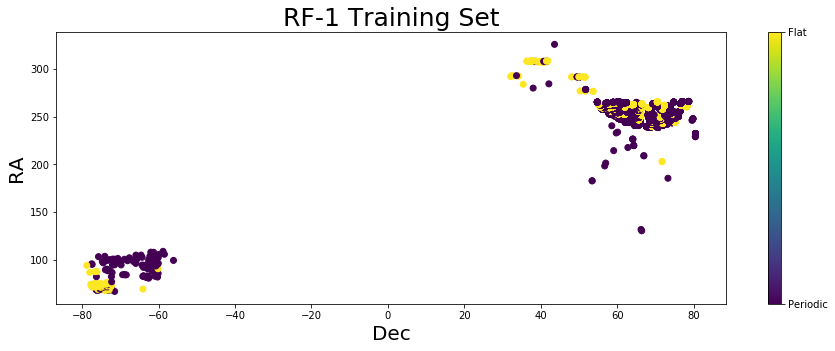

In [46]:
fig, ax = plt.subplots(figsize=(15,5))
# cax = ax.scatter(rf1_final['Teff'],rf1_final['RA_orig'],c=rf1_final['CLASS'])
# ax.set_xlabel('Teff',fontsize=20)

cax = ax.scatter(rf1_final['Dec_orig'],rf1_final['RA_orig'],c=rf1_final['CLASS'])
ax.set_xlabel('Dec',fontsize=20)

ax.set_title('RF-1 Training Set',fontsize=25)
ax.set_ylabel('RA',fontsize=20)
cbar = fig.colorbar(cax, ticks=[1., 5])
cbar.ax.set_yticklabels(['Periodic', 'Flat']);  # vertically oriented colorbar

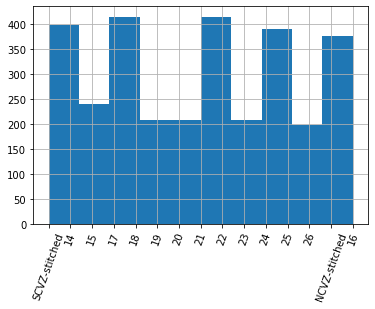

In [47]:
rf1_final['Sector'].hist()
plt.xticks(rotation=70);

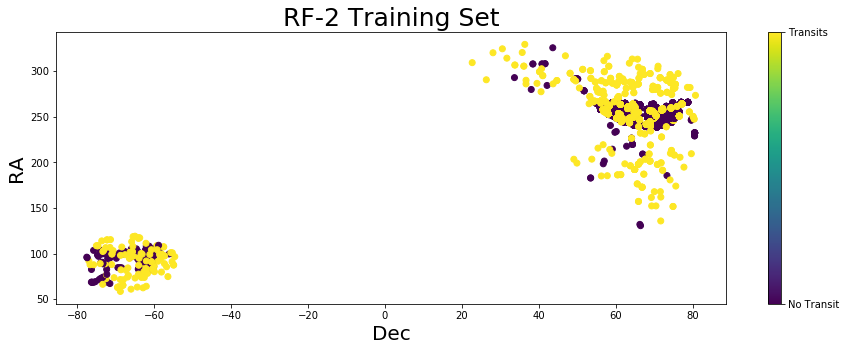

In [42]:
fig, ax = plt.subplots(figsize=(15,5))
# cax = ax.scatter(rf2_final['Teff'],rf2_final['RA_orig'],c=rf2_final['CLASS'])
# ax.set_xlabel('Teff',fontsize=20)


cax = ax.scatter(rf2_final['Dec_orig'],rf2_final['RA_orig'],c=rf2_final['CLASS'])
ax.set_xlabel('Dec',fontsize=20)



ax.set_title('RF-2 Training Set',fontsize=25)
ax.set_ylabel('RA',fontsize=20)
cbar = fig.colorbar(cax, ticks=[1., 3])
cbar.ax.set_yticklabels(['No Transit', 'Transits']);  # vertically oriented colorbar

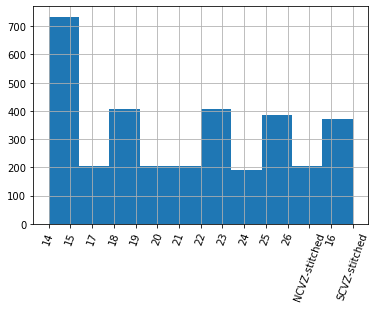

In [45]:
rf2_final['Sector'].hist()
plt.xticks(rotation=70);

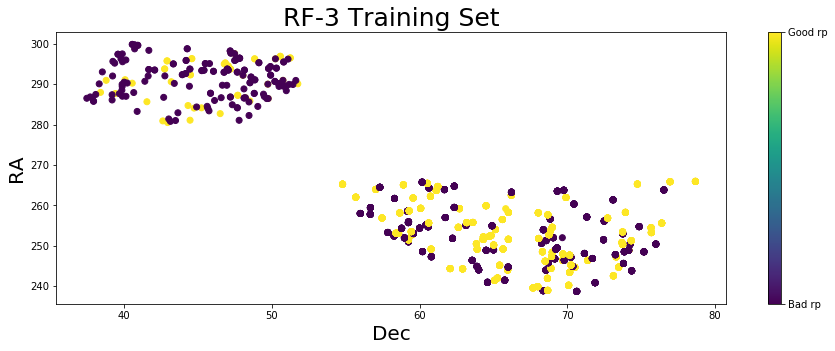

In [36]:
fig, ax = plt.subplots(figsize=(15,5))
# cax = ax.scatter(rf3_final['Teff'],rf3_final['RA_orig'],c=rf3_final['Label'])
# ax.set_xlabel('Teff',fontsize=20)

cax = ax.scatter(rf3_final['Dec_orig'],rf3_final['RA_orig'],c=rf3_final['Label'])
ax.set_xlabel('Dec',fontsize=20)

ax.set_title('RF-3 Training Set',fontsize=25)
ax.set_ylabel('RA',fontsize=20)
cbar = fig.colorbar(cax, ticks=[1., 3])
cbar.ax.set_yticklabels(['Bad rp', 'Good rp']);  # vertically oriented colorbar

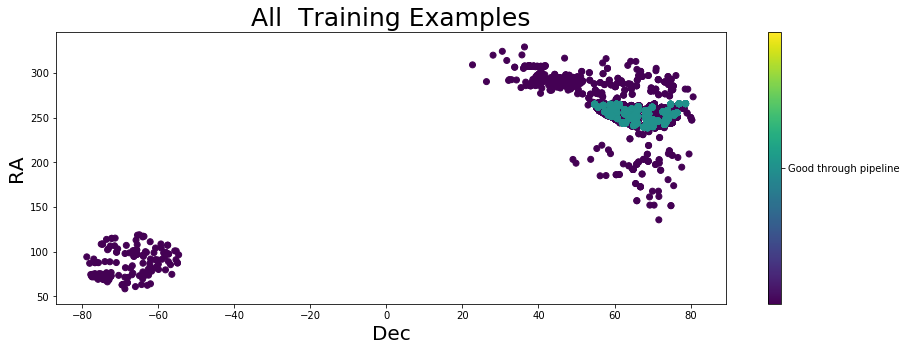

In [71]:
#isolate train ex. that make it thru full pipeline
two_tsets = pd.merge(rf1_final,rf2_final, on=['TIC','Sector'])
all_tsets = pd.merge(two_tsets,rf3_final, on = ['TIC','Sector'])
all_tsets
#goods
all_tsets_goods = all_tsets[all_tsets['CLASS_x']==1. ]#& (all_tsets['Label']==3)]
all_tsets_goods2 = all_tsets_goods[all_tsets_goods['Label']==3]
#go bad somewhere in pipeline
# all_tsets_bads = all_tsets[all_tsets['CLASS_x']!=1. ]#empty!! why??
rf1_bads = rf1_final[rf1_final['CLASS']!=1]
rf2_bads = rf2_final[rf2_final['CLASS']!=1]
rf3_bads = rf3_final[rf3_final['Label']!=3]
all_tsets_bads2 = all_tsets[all_tsets['Label']!=3]
class1 = np.repeat(1,len(rf1_bads))
class2 = np.repeat(1.,len(rf2_bads))
class3 = np.repeat(1.,len(rf3_bads))


fig, ax = plt.subplots(figsize=(15,5))
# cax = ax.scatter(all_tsets_bads['Dec_orig'],all_tsets_bads['RA_orig'],c=np.repeat(1.,len(all_tsets_bads)))
# cax = ax.scatter(all_tsets_bads2['Dec_orig'],all_tsets_bads2['RA_orig'],c=np.repeat(1.,len(all_tsets_bads2)))
cax = ax.scatter(rf1_bads['Dec_orig'],rf1_bads['RA_orig'],c=class1)
cax = ax.scatter(rf2_bads['Dec_orig'],rf2_bads['RA_orig'],c=class2)
cax = ax.scatter(rf3_bads['Dec_orig'],rf3_bads['RA_orig'],c=class3)





cax = ax.scatter(all_tsets_goods2['Dec_orig'],all_tsets_goods2['RA_orig'],c=all_tsets_goods2['Label'])
ax.set_xlabel('Dec',fontsize=20)


ax.set_title('All  Training Examples',fontsize=25)
ax.set_ylabel('RA',fontsize=20)
cbar = fig.colorbar(cax, ticks=[1, 3])
cbar.ax.set_yticklabels(['Bad through pipeline', 'Good through pipeline']); 

In [53]:
# rf1_final[['CLASS']]#,'Label']]
# rf2_final[['CLASS']]#,'Label']]
# rf3_final[['Label']]
print(len(rf1_final)+len(rf2_final)+len(rf3_final))
# all_tsets = pd.concat([rf1_final,rf2_final,rf3_final], axis=1, join="inner")
two_tsets = pd.merge(rf1_final,rf2_final, on=['TIC','Sector'])
all_tsets = pd.merge(two_tsets,rf3_final, on = ['TIC','Sector'])
all_tsets

all_tsets_goods = all_tsets[all_tsets['CLASS_x']==1. ]#& (all_tsets['Label']==3)]
all_tsets_goods2 = all_tsets_goods[all_tsets_goods['Label']==3]

all_tsets_goods

8748


Unnamed: 0_x        TIC  CLASS_x         Sector    rvar_x    ls-1_x  \
0              217  198384408        1             14  0.003727  9.614193   
1              217  198384408        1             14  0.003727  9.614193   
2              217  198384408        1             14  0.003727  9.614193   
3             1840  198384408        1             14  0.003727  9.614193   
4             1840  198384408        1             14  0.003727  9.614193   
...            ...        ...      ...            ...       ...       ...   
2347          2697  288382739        1             22  0.005656  5.076674   
2348          2698  288382739        1             23  0.005979  5.376826   
2349          2699  288382739        1             25  0.007534  8.129682   
2350          2700  288382739        1             26  0.006336  5.208844   
2351          2701  288382739        1  NCVZ-stitched  0.005952  8.402833   

         ls-2_x     ls-3_x  lsamp-1_x  lsamp-2_x  ...  e_RA_orig  e_Dec_orig  \
0     19.987067   6.369679   0.408860   0.228873  ...   0.279878    0.376192   
1     19.987067   6.369679   0.408860   0.228873  ...   0.279878    0.376192   
2     19.987067   6.369679   0.408860   0.228873  ...   0.279878    0.376192   
3     19.987067   6.369679   0.408860   0.228873  ...   0.279878    0.376192   
4     19.987067   6.369679   0.408860   0.228873  ...   0.279878    0.376192   
...         ...        ...        ...        ...  ...        ...         ...   
2347   8.474013  13.509186   0.065569   0.027878  ...   0.015311    0.020752   
2348   7.692099  13.884179   0.099091   0.098885  ...   0.015311    0.020752   
2349   5.319641   3.832059   0.211007   0.178913  ...   0.015311    0.020752   
2350   7.633404   3.937646   0.095172   0.034831  ...   0.015311    0.020752   
2351   7.936195   5.181862   0.025117   0.023201  ...   0.015311    0.020752   

      raddflag  wdflag        objID           ID  KIC_x_y  KIC_y_y MQ_Prot  \
0          1.0     0.0  167343081.0          NaN      NaN      NaN     NaN   
1          1.0     0.0  167343081.0          NaN      NaN      NaN     NaN   
2          1.0     0.0  167343081.0          NaN      NaN      NaN     NaN   
3          1.0     0.0  167343081.0          NaN      NaN      NaN     NaN   
4          1.0     0.0  167343081.0          NaN      NaN      NaN     NaN   
...        ...     ...          ...          ...      ...      ...     ...   
2347       1.0     0.0  175311456.0          NaN      NaN      NaN     NaN   
2348       1.0     0.0  175311456.0          NaN      NaN      NaN     NaN   
2349       1.0     0.0  175311456.0          NaN      NaN      NaN     NaN   
2350       1.0     0.0  175311456.0          NaN      NaN      NaN     NaN   
2351       1.0     0.0  175311456.0  288382739.0      NaN      NaN     NaN   

     GAIA_AbsMag  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
...          ...  
2347         NaN  
2348         NaN  
2349         NaN  
2350         NaN  
2351         NaN  

[2352 rows x 423 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2c656e10>,
      dtype=object)

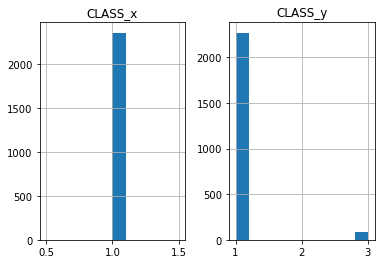

In [62]:
all_tsets[['CLASS_x','CLASS_y']].hist()

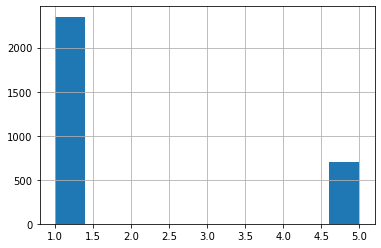

In [63]:
rf1_final['CLASS'].hist()

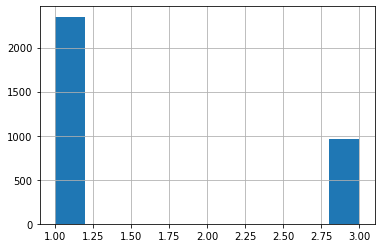

In [64]:
rf2_final['CLASS'].hist()

# test-3 results

In [11]:
##load data

run_num = 3
#original stats df
# allstats = pd.read_csv('/Volumes/Seagate-stars/Final_Run/test_sets/master_df.csv')#includes ncvz google df & tois in rf2
mqdata = pd.read_csv('data/mcquillan_sample.csv')
# train sets
rf1_final = pd.read_csv('/Volumes/Seagate-stars/Final_Run/test_sets/rf1_training.csv')
rf2_final = pd.read_csv('/Volumes/Seagate-stars/Final_Run/test_sets/rf2_training.csv')
rf3_final = pd.read_csv('/Volumes/Seagate-stars/Final_Run/test_sets/rf3_training.csv')
# result dfs
acc = pd.read_csv('/Volumes/Seagate-stars/Final_Run/test_sets/test-{}/RF123_accuracy_df_v{}.csv'.format(run_num,run_num))
results = pd.read_csv('/Volumes/Seagate-stars/Final_Run/test_sets/test-{}/RF123_results_df_v{}.csv'.format(run_num,run_num))





/Users/helenfellow/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (2,99) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
#remove training sets to get unseen results
tic1 = rf1_final['TIC'].unique()
tic2 = rf2_final['TIC'].unique()
tic3 = rf3_final['TIC'].unique()
alltics = np.concatenate([tic1,tic2,tic3])
traintics = np.unique(alltics)
#see if results are in tics
mask = [np.isin(results['TIC'].iloc[i],traintics)==True for i in range(len(results))]
not_mask = np.logical_not(mask) #b/c ~ wont work with T/F
train_results = results[mask]
unseen_results =results[not_mask]

#full training set results
RF3_master_data = unseen_results
rf1_goodcut = (RF3_master_data['RF1predict_class']==1.0) #periodic
rf2_goodcut = (RF3_master_data['RF2predict_class']==1.0) #no transit
rf3_goodcut = (RF3_master_data['RF3predict_class']==3.0) #good Prot
rf3_badcut = (RF3_master_data['RF3predict_class']==1.0) #bad Prot
rf3_good_unseenpredictions = RF3_master_data[rf1_goodcut & rf2_goodcut & rf3_goodcut] #passed RF 1&2&3
## final good plot
myxs_unseen = rf3_good_unseenpredictions['Teff'].to_numpy()
myys_unseen = rf3_good_unseenpredictions['ls-1'].to_numpy()
RF3_master_data = train_results

#only training set expected to be predicted good
rf1_goodcut = (RF3_master_data['RF1predict_class']==1.0) #periodic
rf2_goodcut = (RF3_master_data['RF2predict_class']==1.0) #no transit
rf3_goodcut = (RF3_master_data['RF3predict_class']==3.0) #good Prot
rf3_badcut = (RF3_master_data['RF3predict_class']==1.0) #bad Prot
rf3_good_trainpredictions = RF3_master_data[rf1_goodcut & rf2_goodcut & rf3_goodcut] #passed RF 1&2&3
## final good plot
myxs_train = rf3_good_trainpredictions['Teff'].to_numpy()
myys_train = rf3_good_trainpredictions['ls-1'].to_numpy()

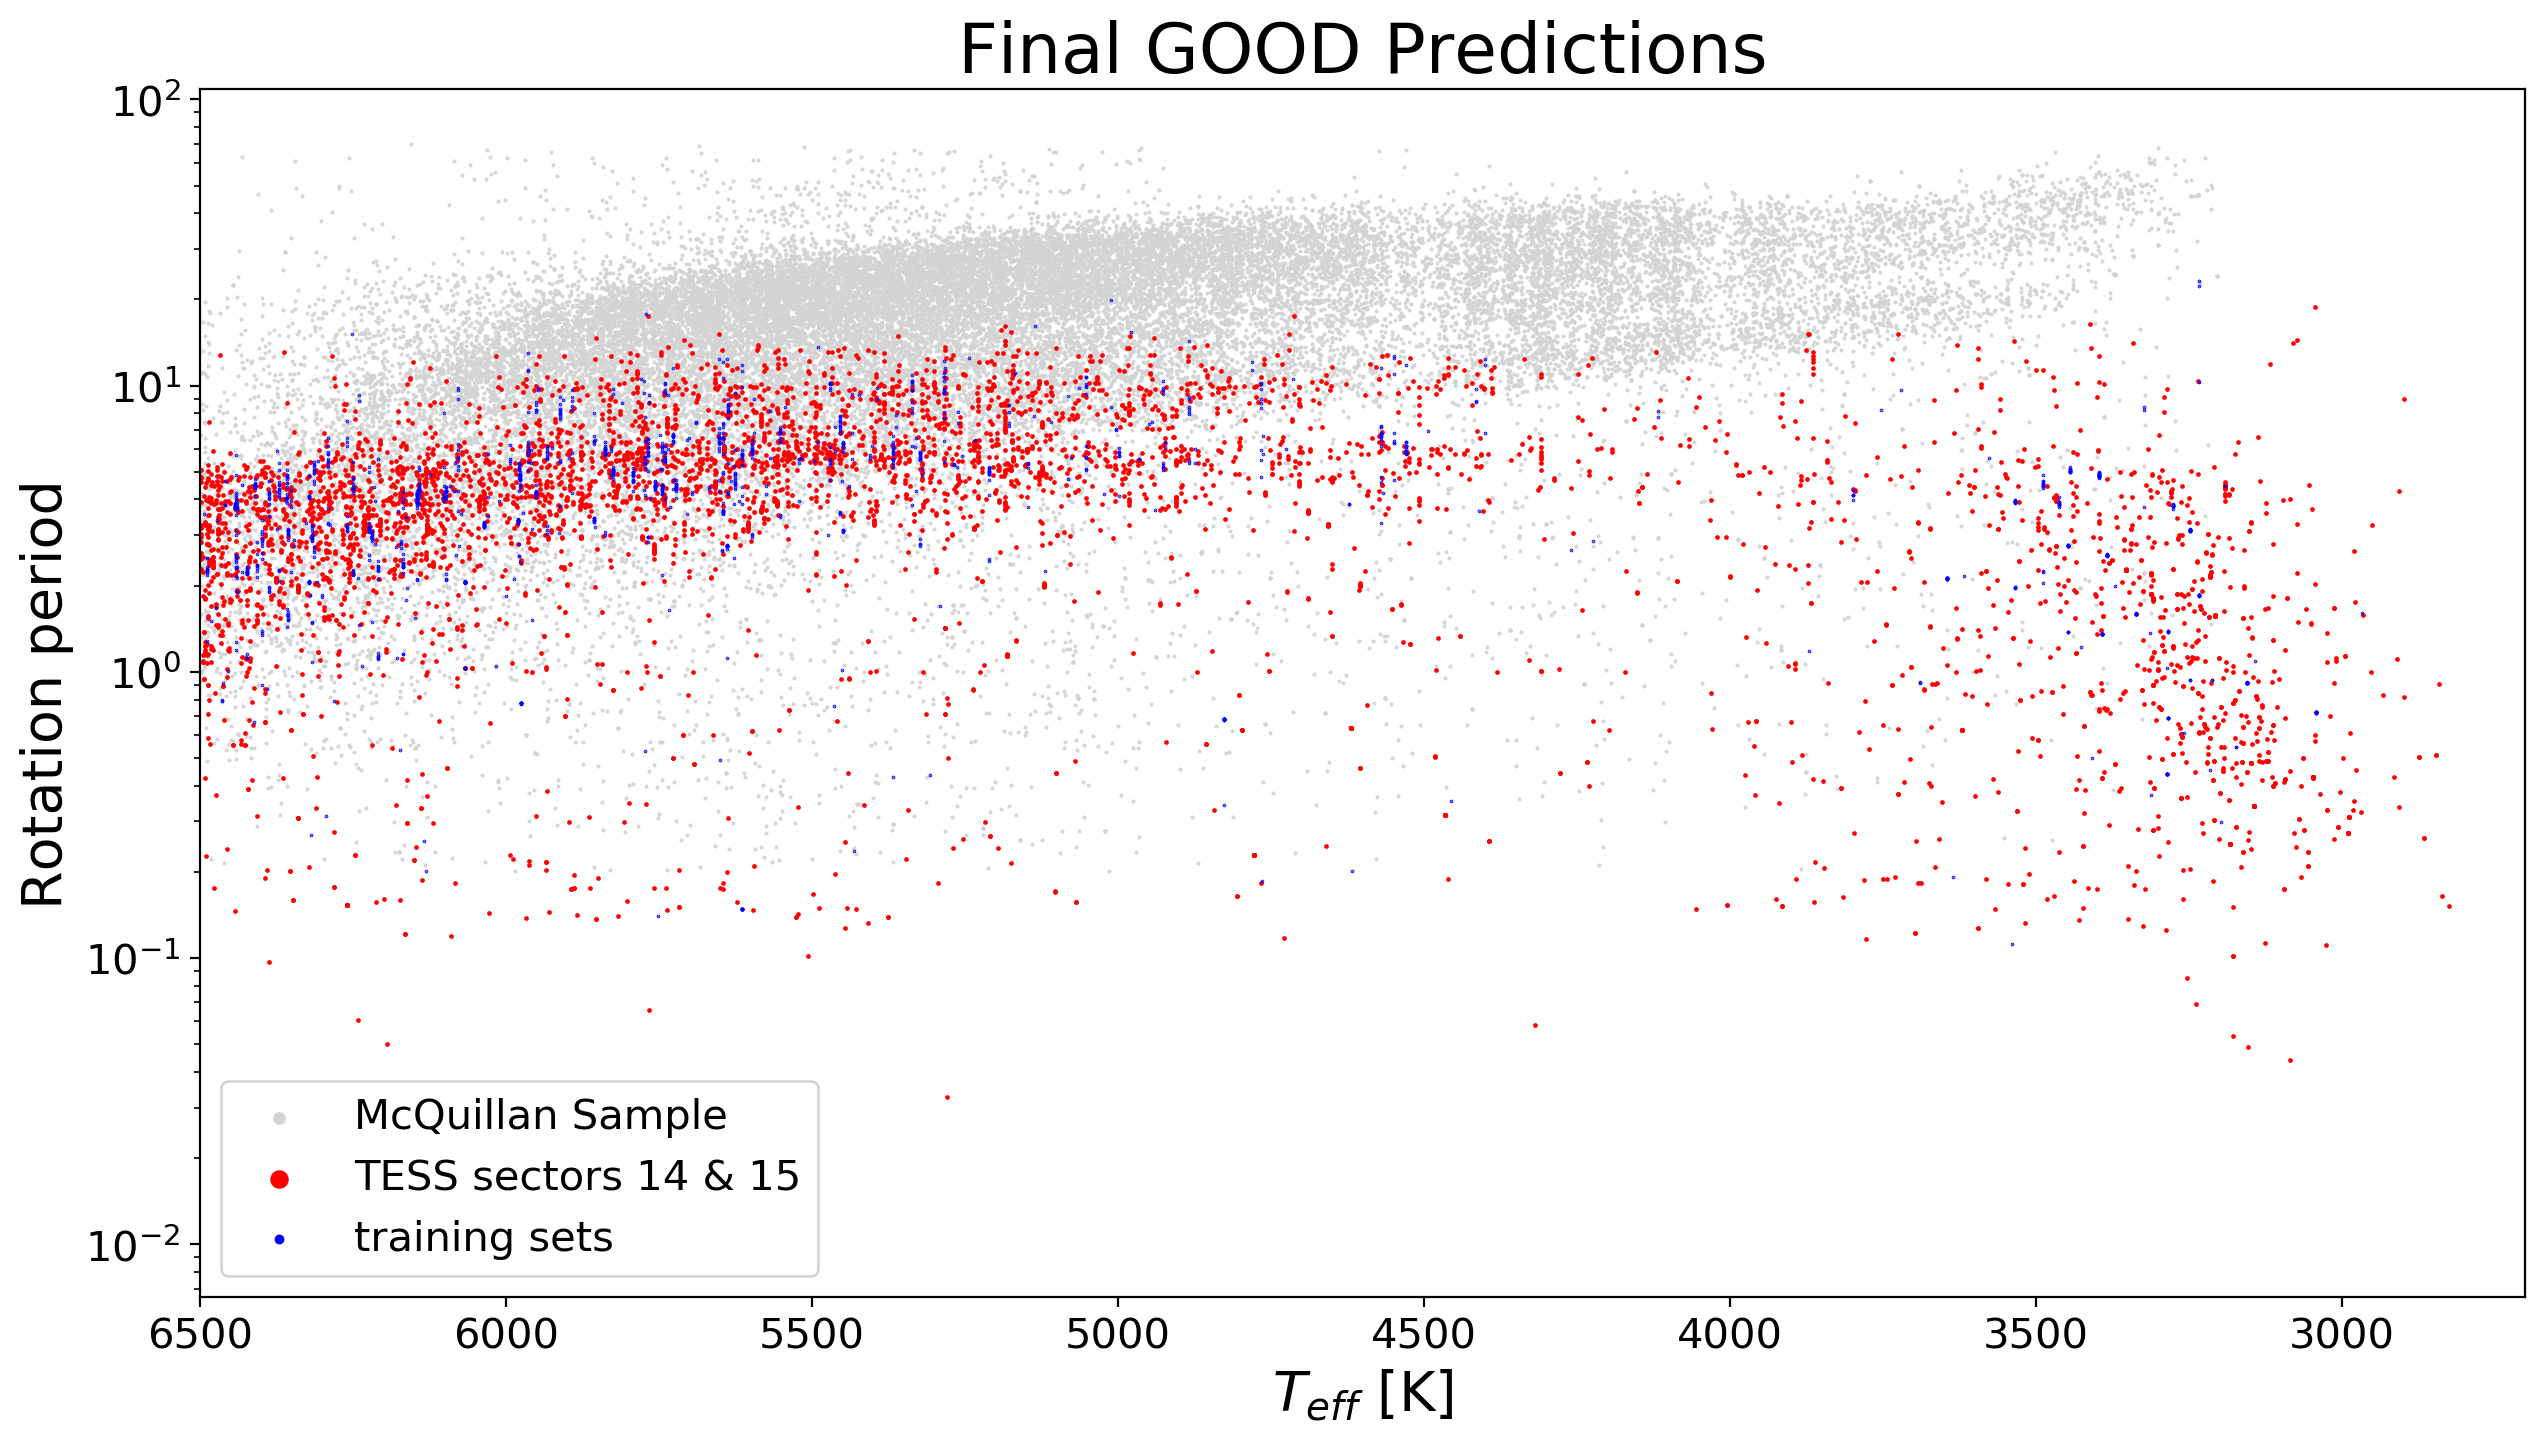

In [13]:
#plot good predictions
f =plt.figure(figsize=(15,8),dpi=200)
plt.scatter(mqdata['TEMP'],mqdata['ROTATION_PERIOD'].to_numpy(),color='lightgrey',s=.2,rasterized=True,label='McQuillan Sample')
plt.scatter(myxs_unseen,myys_unseen,s=.5,label='TESS sectors 14 & 15',color='r',rasterized=True)
plt.scatter(myxs_train,myys_train,s=.1,label='training sets',color='b',rasterized=True)


plt.ylabel('Rotation period',fontsize=20); plt.xlabel('$T_{eff}$ [K]',fontsize=20)
plt.title('Final GOOD Predictions',fontsize=25)
plt.legend(fontsize=15,markerscale=8)
plt.yticks(fontsize=15);plt.xticks(fontsize=15)
plt.yscale('log')
plt.xlim(6500,2700);

In [14]:
acc

test       oob         CV  good_percent  bad_percent  good_number  \
0  0.889908  0.899432  89.868852     40.211348    59.434283        18950   
1  0.766626  0.792019  78.718259     93.693931     6.306069        17755   
2  0.767241  0.759770  76.594828     37.206421    62.562658         6606   

   nan_loss  train total  good_trainexs  bad_trainexs  
0         0     0.914298           2351           699  
1         0     0.802902           2350           958  
2        70     0.794828           1182          1138

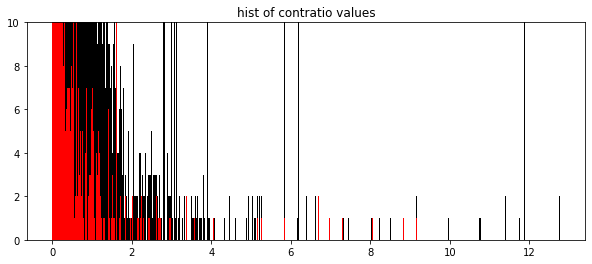

In [15]:
#check contratio distribution in good results

goods = rf3_good_unseenpredictions['contratio'].to_numpy()
alls = results['contratio'].to_numpy()
mybins=1000
plt.figure(figsize=(10,4))
plt.hist(goods,bins=mybins,color='r',label='good out pipeline',zorder=1)
plt.hist(alls,bins=mybins,color='k',label='all values',zorder=0)
plt.title('hist of contratio values')
plt.ylim(0,10);

# test-2 results

In [3]:
##load data

run_num = 2
#original stats df
allstats = pd.read_csv('/Volumes/Seagate-stars/Final_Run/test_sets/master_df.csv')#includes ncvz google df & tois in rf2
mqdata = pd.read_csv('data/mcquillan_sample.csv')
# train sets
rf1_final = pd.read_csv('/Volumes/Seagate-stars/Final_Run/test_sets/rf1_training.csv')
rf2_final = pd.read_csv('/Volumes/Seagate-stars/Final_Run/test_sets/rf2_training.csv')
rf3_final = pd.read_csv('/Volumes/Seagate-stars/Final_Run/test_sets/rf3_training.csv')
# result dfs
acc = pd.read_csv('/Volumes/Seagate-stars/Final_Run/test_sets/test-{}/RF123_accuracy_df_v{}.csv'.format(run_num,run_num))
results = pd.read_csv('/Volumes/Seagate-stars/Final_Run/test_sets/test-{}/RF123_results_df_v{}.csv'.format(run_num,run_num))




/Users/helenfellow/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (2,99) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
#remove training sets to get unseen results
tic1 = rf1_final['TIC'].unique()
tic2 = rf2_final['TIC'].unique()
tic3 = rf3_final['TIC'].unique()
alltics = np.concatenate([tic1,tic2,tic3])
traintics = np.unique(alltics)
#see if results are in tics
mask = [np.isin(results['TIC'].iloc[i],traintics)==True for i in range(len(results))]
not_mask = np.logical_not(mask) #b/c ~ wont work with T/F
train_results = results[mask]
unseen_results =results[not_mask]

#full training set results
RF3_master_data = unseen_results
rf1_goodcut = (RF3_master_data['RF1predict_class']==1.0) #periodic
rf2_goodcut = (RF3_master_data['RF2predict_class']==1.0) #no transit
rf3_goodcut = (RF3_master_data['RF3predict_class']==3.0) #good Prot
rf3_badcut = (RF3_master_data['RF3predict_class']==1.0) #bad Prot
rf3_good_unseenpredictions = RF3_master_data[rf1_goodcut & rf2_goodcut & rf3_goodcut] #passed RF 1&2&3
## final good plot
myxs_unseen = rf3_good_unseenpredictions['Teff'].to_numpy()
myys_unseen = rf3_good_unseenpredictions['ls-1'].to_numpy()
RF3_master_data = train_results

#only training set expected to be predicted good
rf1_goodcut = (RF3_master_data['RF1predict_class']==1.0) #periodic
rf2_goodcut = (RF3_master_data['RF2predict_class']==1.0) #no transit
rf3_goodcut = (RF3_master_data['RF3predict_class']==3.0) #good Prot
rf3_badcut = (RF3_master_data['RF3predict_class']==1.0) #bad Prot
rf3_good_trainpredictions = RF3_master_data[rf1_goodcut & rf2_goodcut & rf3_goodcut] #passed RF 1&2&3
## final good plot
myxs_train = rf3_good_trainpredictions['Teff'].to_numpy()
myys_train = rf3_good_trainpredictions['ls-1'].to_numpy()

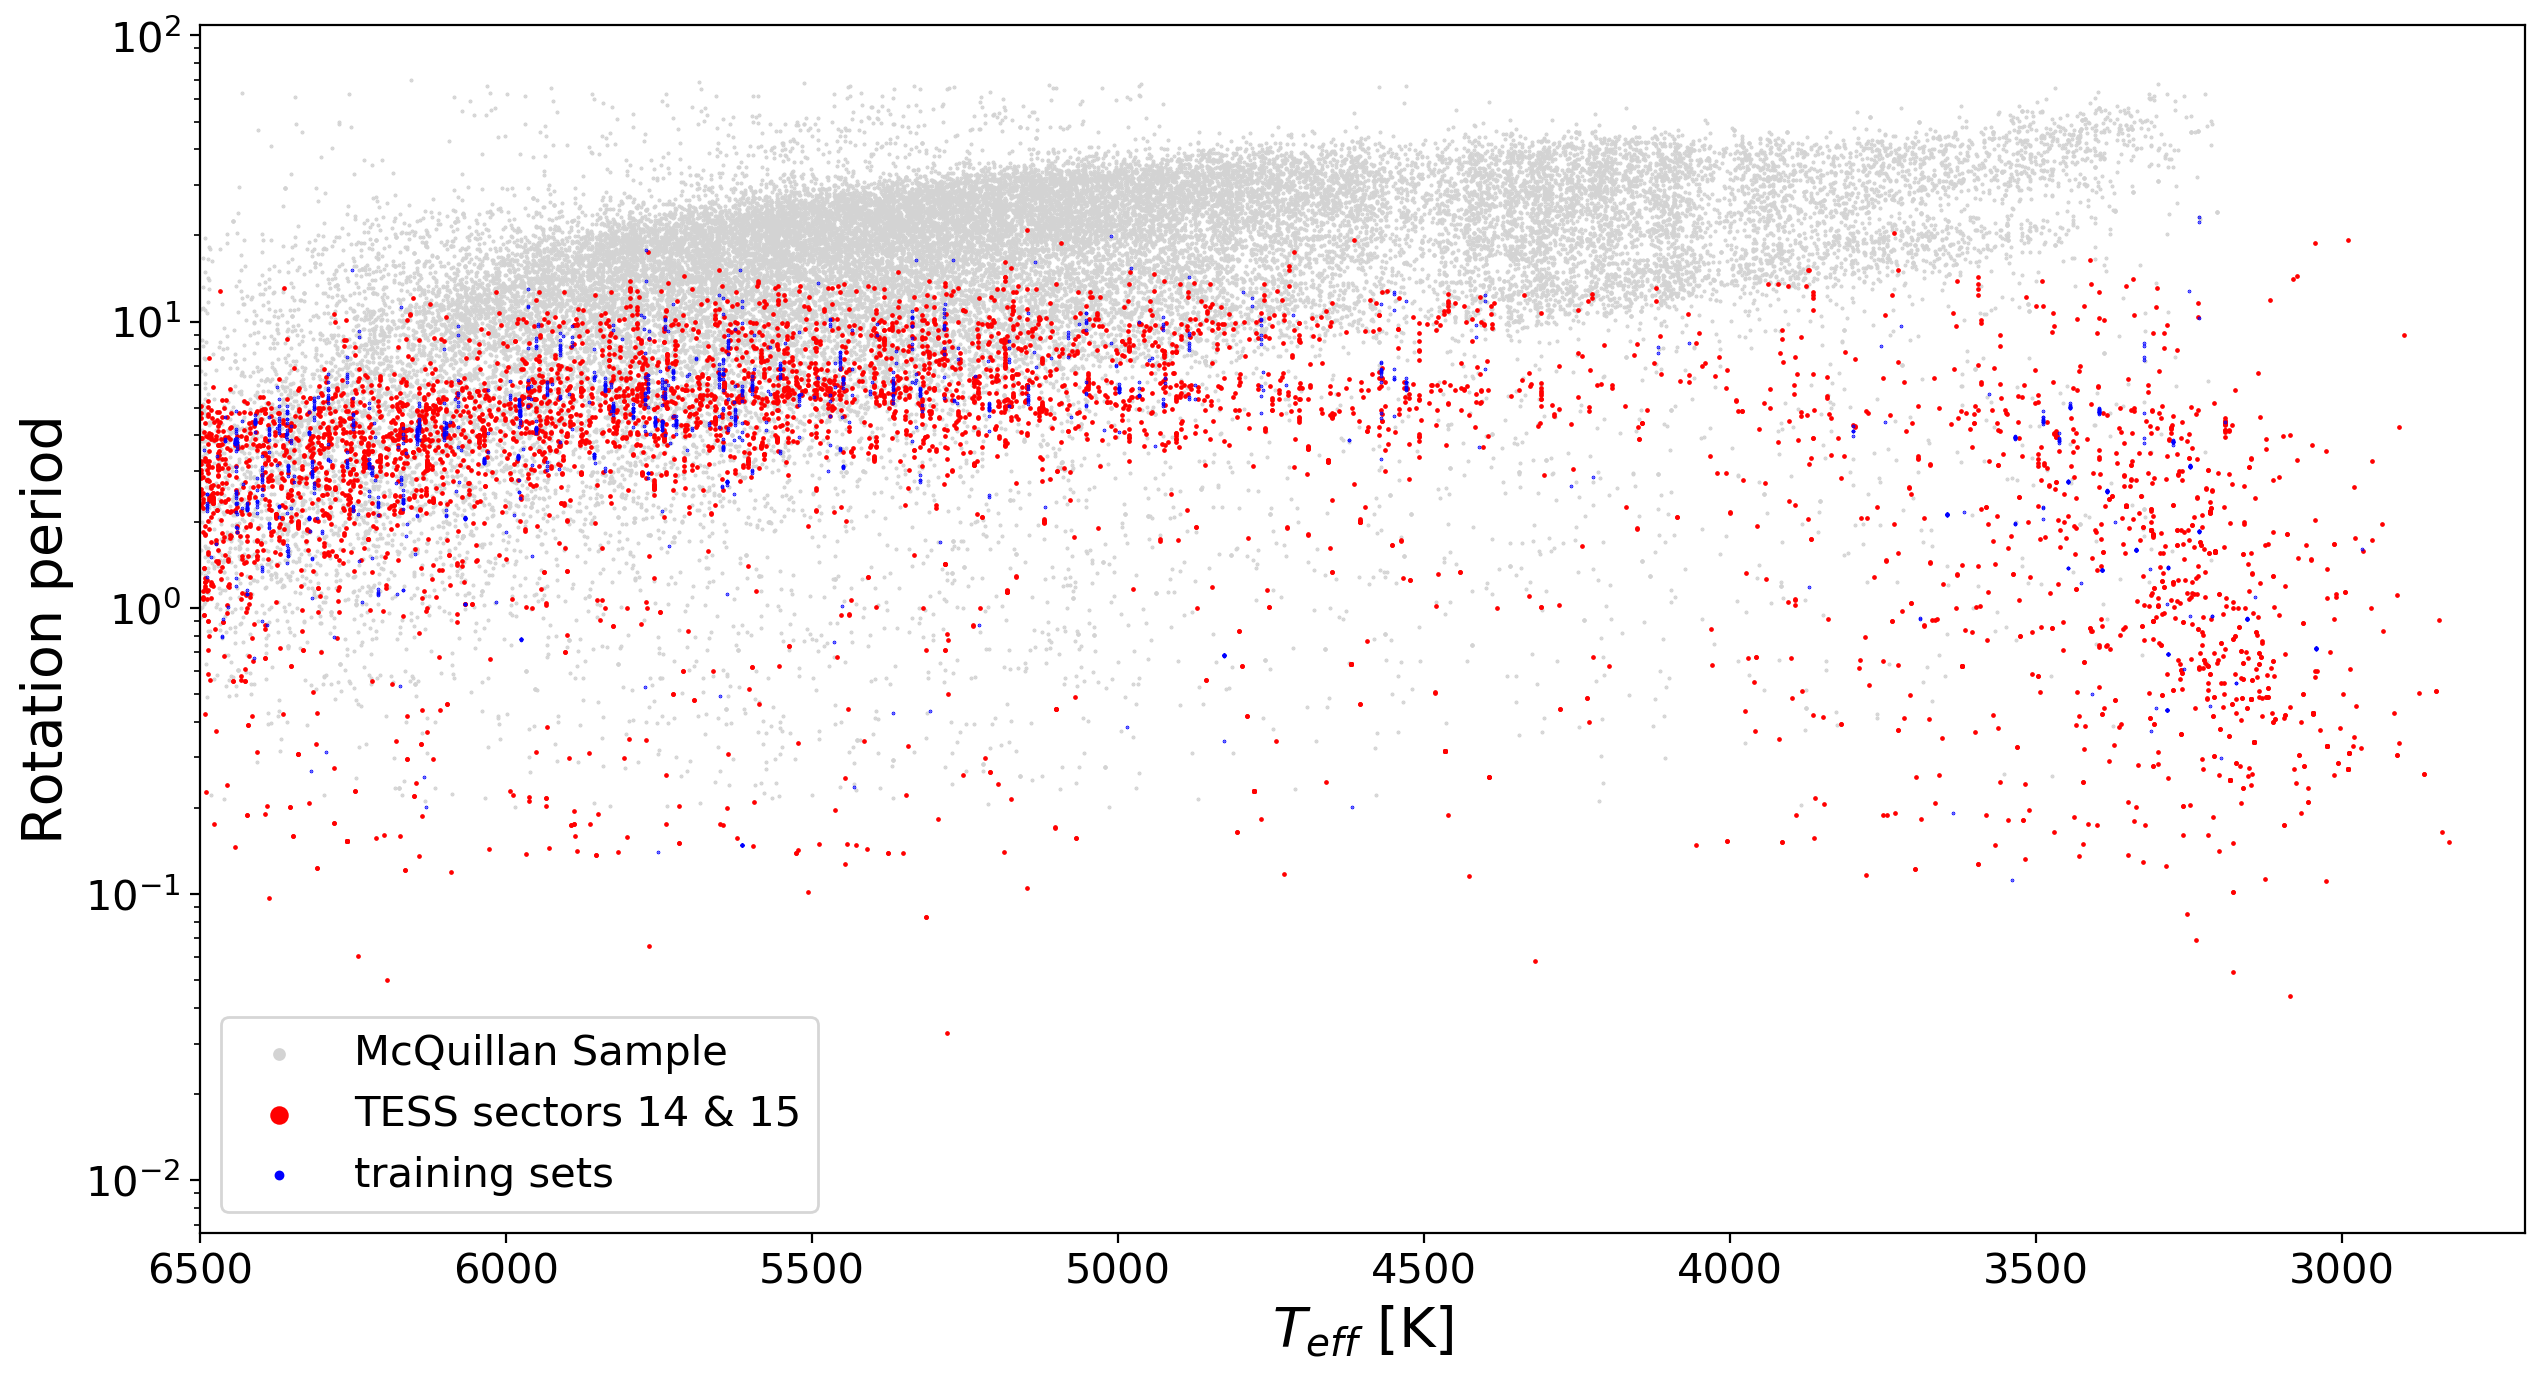

In [6]:
#plot good predictions
f =plt.figure(figsize=(15,8),dpi=200)
plt.scatter(mqdata['TEMP'],mqdata['ROTATION_PERIOD'].to_numpy(),color='lightgrey',s=.2,rasterized=True,label='McQuillan Sample')
plt.scatter(myxs_unseen,myys_unseen,s=.5,label='TESS sectors 14 & 15',color='r',rasterized=True)
plt.scatter(myxs_train,myys_train,s=.1,label='training sets',color='b',rasterized=True)


plt.ylabel('Rotation period',fontsize=20); plt.xlabel('$T_{eff}$ [K]',fontsize=20)
plt.title('Final GOOD Predictions',fontsize=25)
plt.legend(fontsize=15,markerscale=8)
plt.yticks(fontsize=15);plt.xticks(fontsize=15)
plt.yscale('log')
plt.xlim(6500,2700);

In [7]:
acc

test       oob         CV  good_percent  bad_percent  good_number  \
0  0.889908  0.899432  89.868852     40.211348    59.434283        18950   
1  0.766626  0.792019  78.718259     93.693931     6.306069        17755   
2  0.760870  0.745536  75.062762     37.155731    62.844269         6597   

   nan_loss  train total  good_trainexs  bad_trainexs  
0         0     0.914298           2351           699  
1         0     0.802902           2350           958  
2         0     0.777344           1252          1138

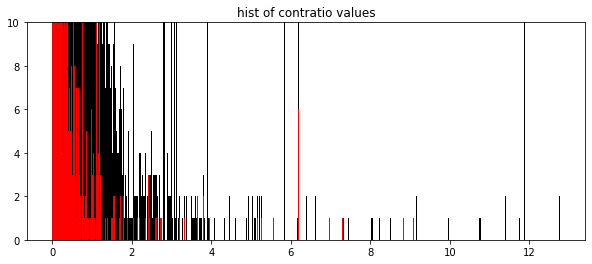

In [10]:
#check contratio distribution in good results

goods = rf3_good_unseenpredictions['contratio'].to_numpy()
alls = results['contratio'].to_numpy()
mybins=1000
plt.figure(figsize=(10,4))
plt.hist(goods,bins=mybins,color='r',label='good out pipeline',zorder=1)
plt.hist(alls,bins=mybins,color='k',label='all values',zorder=0)
plt.title('hist of contratio values')
plt.ylim(0,10);

# test-1 results

In [47]:
#open data

main_df = pd.read_csv('data/master_data.csv') #old one
# rf1_train = pd.read_csv('data/RF1_TrainingSet_nogiants.csv') #226
# print(len(rf1_train))
# rf1_train2 = pd.read_csv('data/RF1-TrainingSet.csv') #google doc? #46
# examples = main_df[np.isnan(main_df['CLASS'])==False]
# rf1_maybe = examples[(examples['CLASS']==1) | (examples['CLASS']==5)] #225
# rf2_train = examples[(examples['CLASS']==1) | (examples['CLASS']==3)] #167
# print(len(rf1_maybe)) 
# rf3_train = pd.read_csv('data/cvz_mq_examples_forRF3.csv') #278

#original df

# train sets
rf1_final = pd.read_csv('/Volumes/Seagate-stars/Final_Run/test_sets/rf1_training.csv')
rf2_final = pd.read_csv('/Volumes/Seagate-stars/Final_Run/test_sets/rf2_training.csv')
rf3_final = pd.read_csv('/Volumes/Seagate-stars/Final_Run/test_sets/rf3_training.csv')
# result dfs
acc = pd.read_csv('/Volumes/Seagate-stars/Final_Run/test_sets/test-1/RF123_accuracy_df_v1.csv')
results = pd.read_csv('/Volumes/Seagate-stars/Final_Run/test_sets/test-1/RF123_results_df_v1.csv')
mqdata = pd.read_csv('data/mcquillan_sample.csv')




In [48]:
#remove training sets to get unseen results
tic1 = rf1_final['TIC'].unique()
tic2 = rf2_final['TIC'].unique()
tic3 = rf3_final['TIC'].unique()
alltics = np.concatenate([tic1,tic2,tic3])
traintics = np.unique(alltics)
#see if results are in tics
mask = [np.isin(results['TIC'].iloc[i],traintics)==True for i in range(len(results))]
not_mask = np.logical_not(mask) #b/c ~ wont work with T/F
train_results = results[mask]
unseen_results =results[not_mask]

In [49]:
RF3_master_data = unseen_results
rf1_goodcut = (RF3_master_data['RF1predict_class']==1.0) #periodic
rf2_goodcut = (RF3_master_data['RF2predict_class']==1.0) #no transit
rf3_goodcut = (RF3_master_data['RF3predict_class']==3.0) #good Prot
rf3_badcut = (RF3_master_data['RF3predict_class']==1.0) #bad Prot
rf3_good_unseenpredictions = RF3_master_data[rf1_goodcut & rf2_goodcut & rf3_goodcut] #passed RF 1&2&3
## final good plot of all unseen data (sec 14/15)
myxs_unseen = rf3_good_unseenpredictions['Teff'].to_numpy()
myys_unseen = rf3_good_unseenpredictions['ls-1'].to_numpy()


RF3_master_data = train_results
rf1_goodcut = (RF3_master_data['RF1predict_class']==1.0) #periodic
rf2_goodcut = (RF3_master_data['RF2predict_class']==1.0) #no transit
rf3_goodcut = (RF3_master_data['RF3predict_class']==3.0) #good Prot
rf3_badcut = (RF3_master_data['RF3predict_class']==1.0) #bad Prot
rf3_good_trainpredictions = RF3_master_data[rf1_goodcut & rf2_goodcut & rf3_goodcut] #passed RF 1&2&3
## final good plot of training set only
myxs_train = rf3_good_trainpredictions['Teff'].to_numpy()
myys_train = rf3_good_trainpredictions['ls-1'].to_numpy()





In [51]:
len(rf3_good_unseenpredictions)/17724

0.15786504175129767

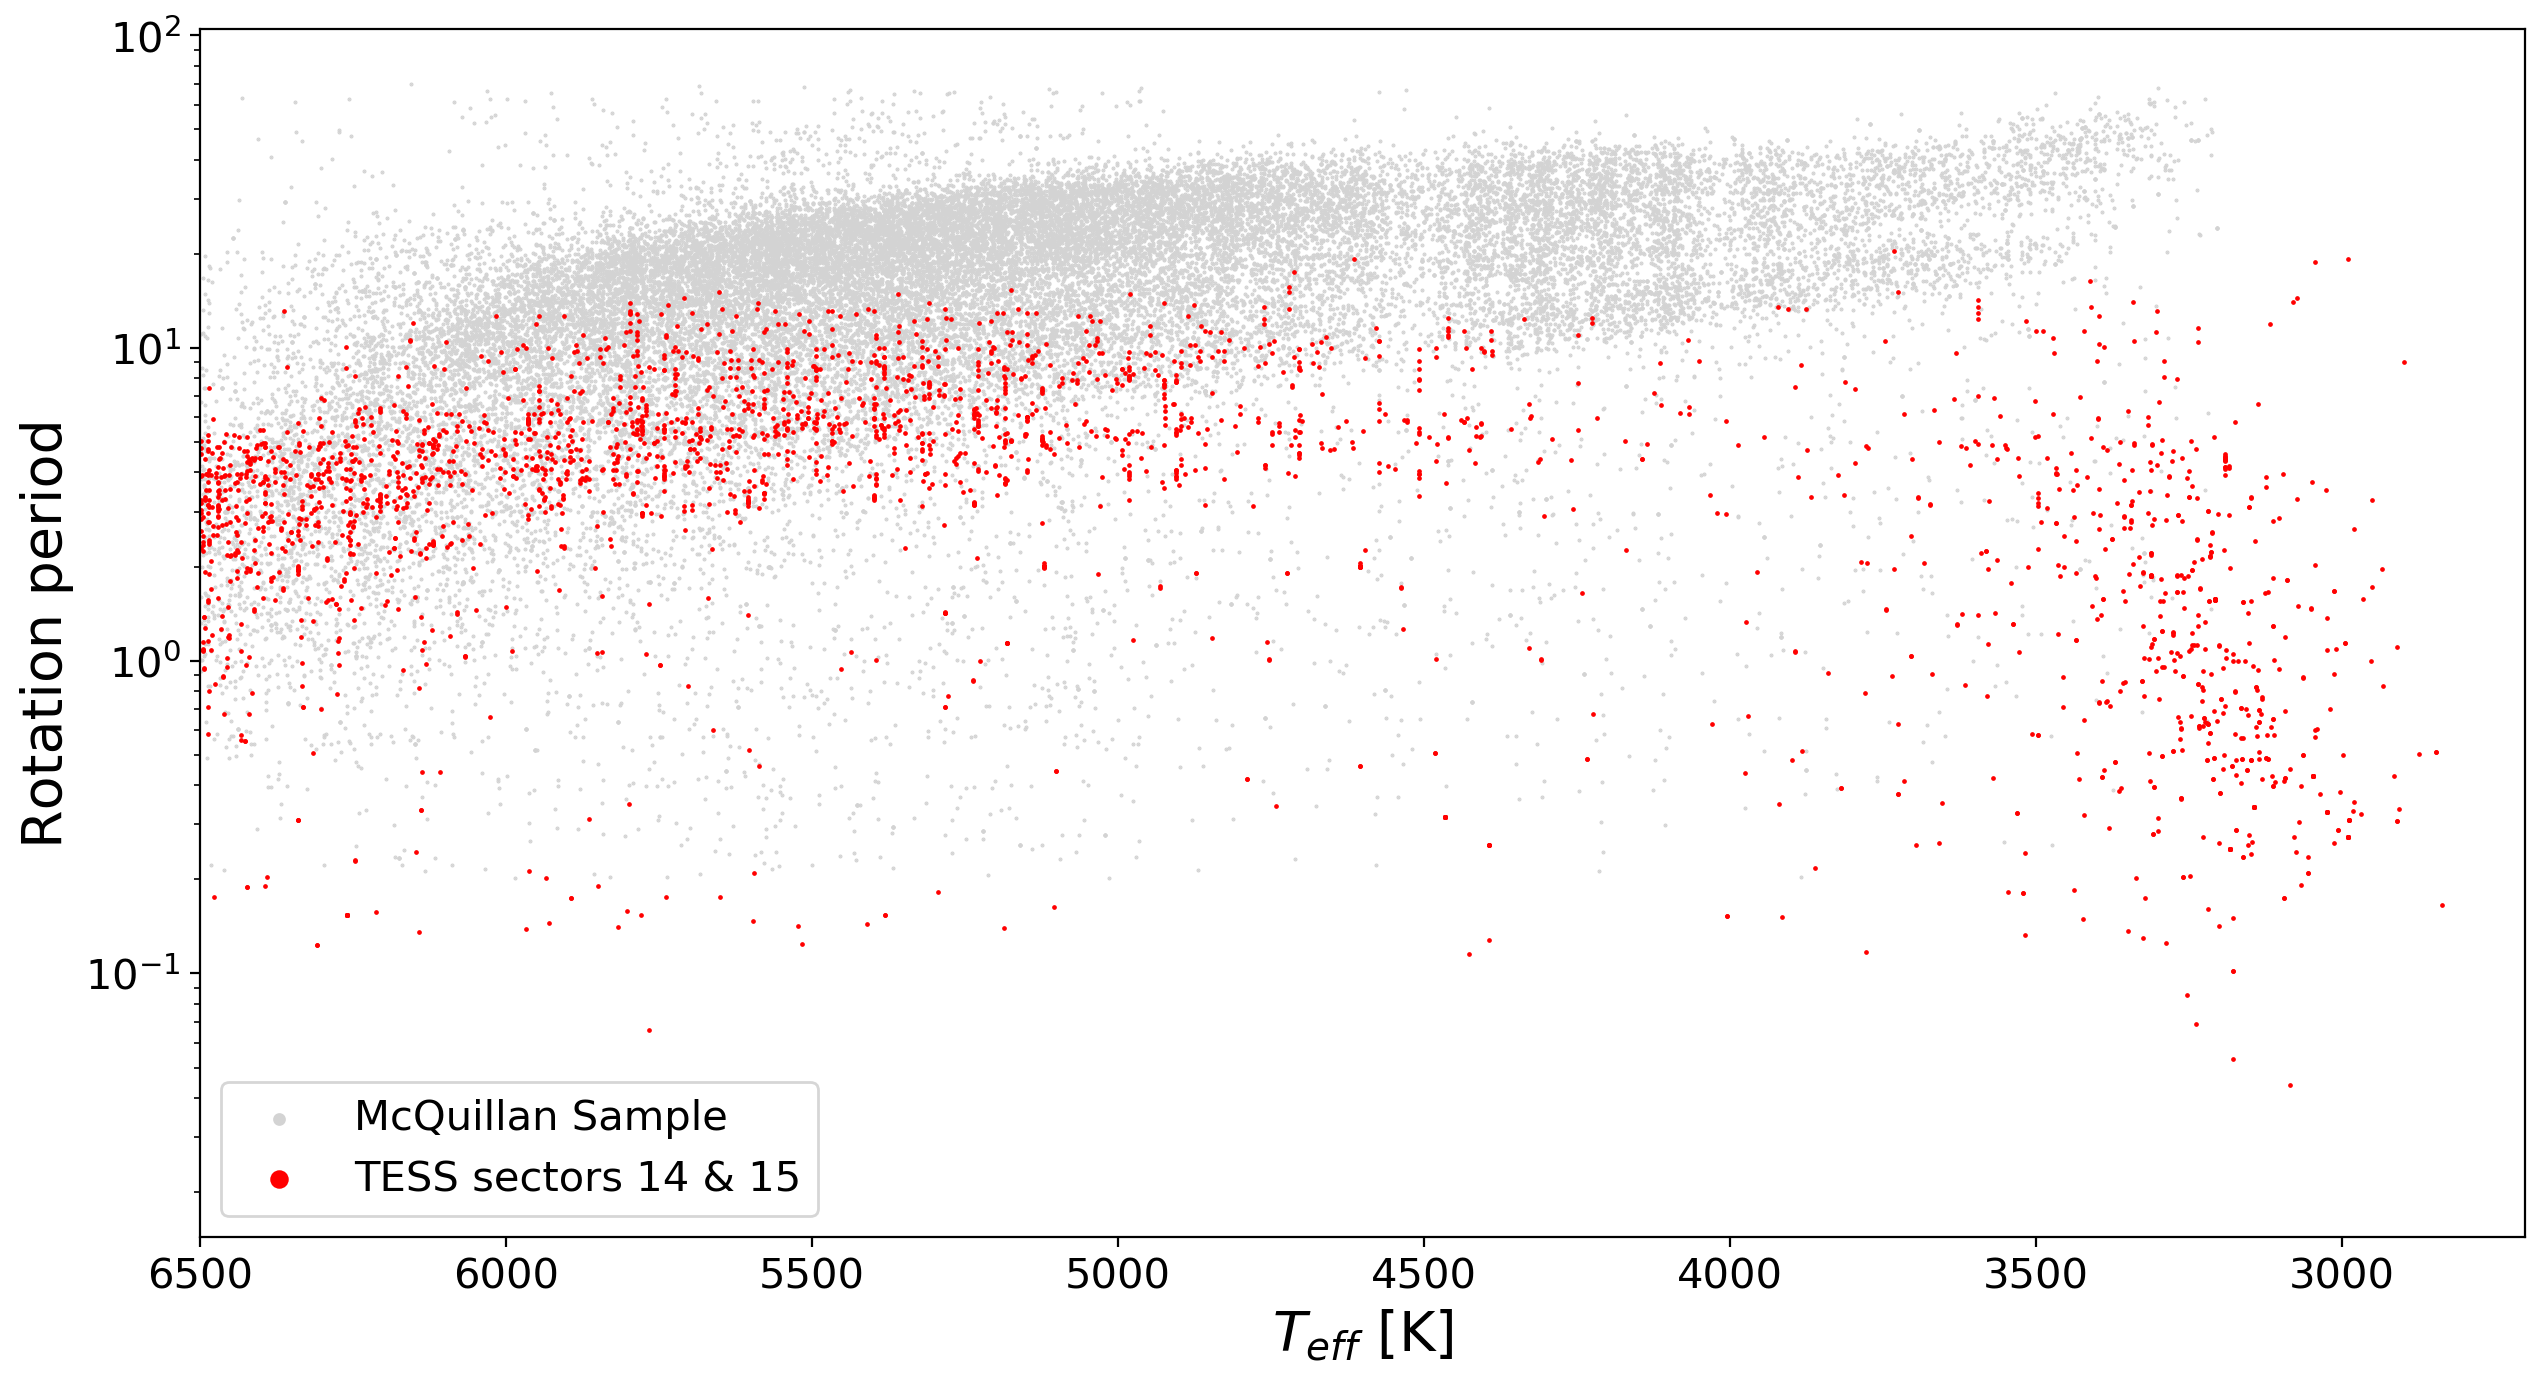

In [68]:

f =plt.figure(figsize=(15,8),dpi=200)
plt.scatter(mqdata['TEMP'],mqdata['ROTATION_PERIOD'].to_numpy(),color='lightgrey',s=.2,rasterized=True,label='McQuillan Sample')
plt.scatter(myxs_unseen,myys_unseen,s=.5,label='TESS sectors 14 & 15',color='r',rasterized=True)
# plt.scatter(myxs_train,myys_train,s=.1,label='training sets',color='b',rasterized=True)


plt.ylabel('Rotation period',fontsize=20); plt.xlabel('$T_{eff}$ [K]',fontsize=20)
# plt.title('Final GOOD Predictions',fontsize=25)
plt.legend(fontsize=15,markerscale=8)
plt.yticks(fontsize=15);plt.xticks(fontsize=15)
plt.yscale('log')
plt.xlim(6500,2700);
# plt.savefig('good_predictions.png')

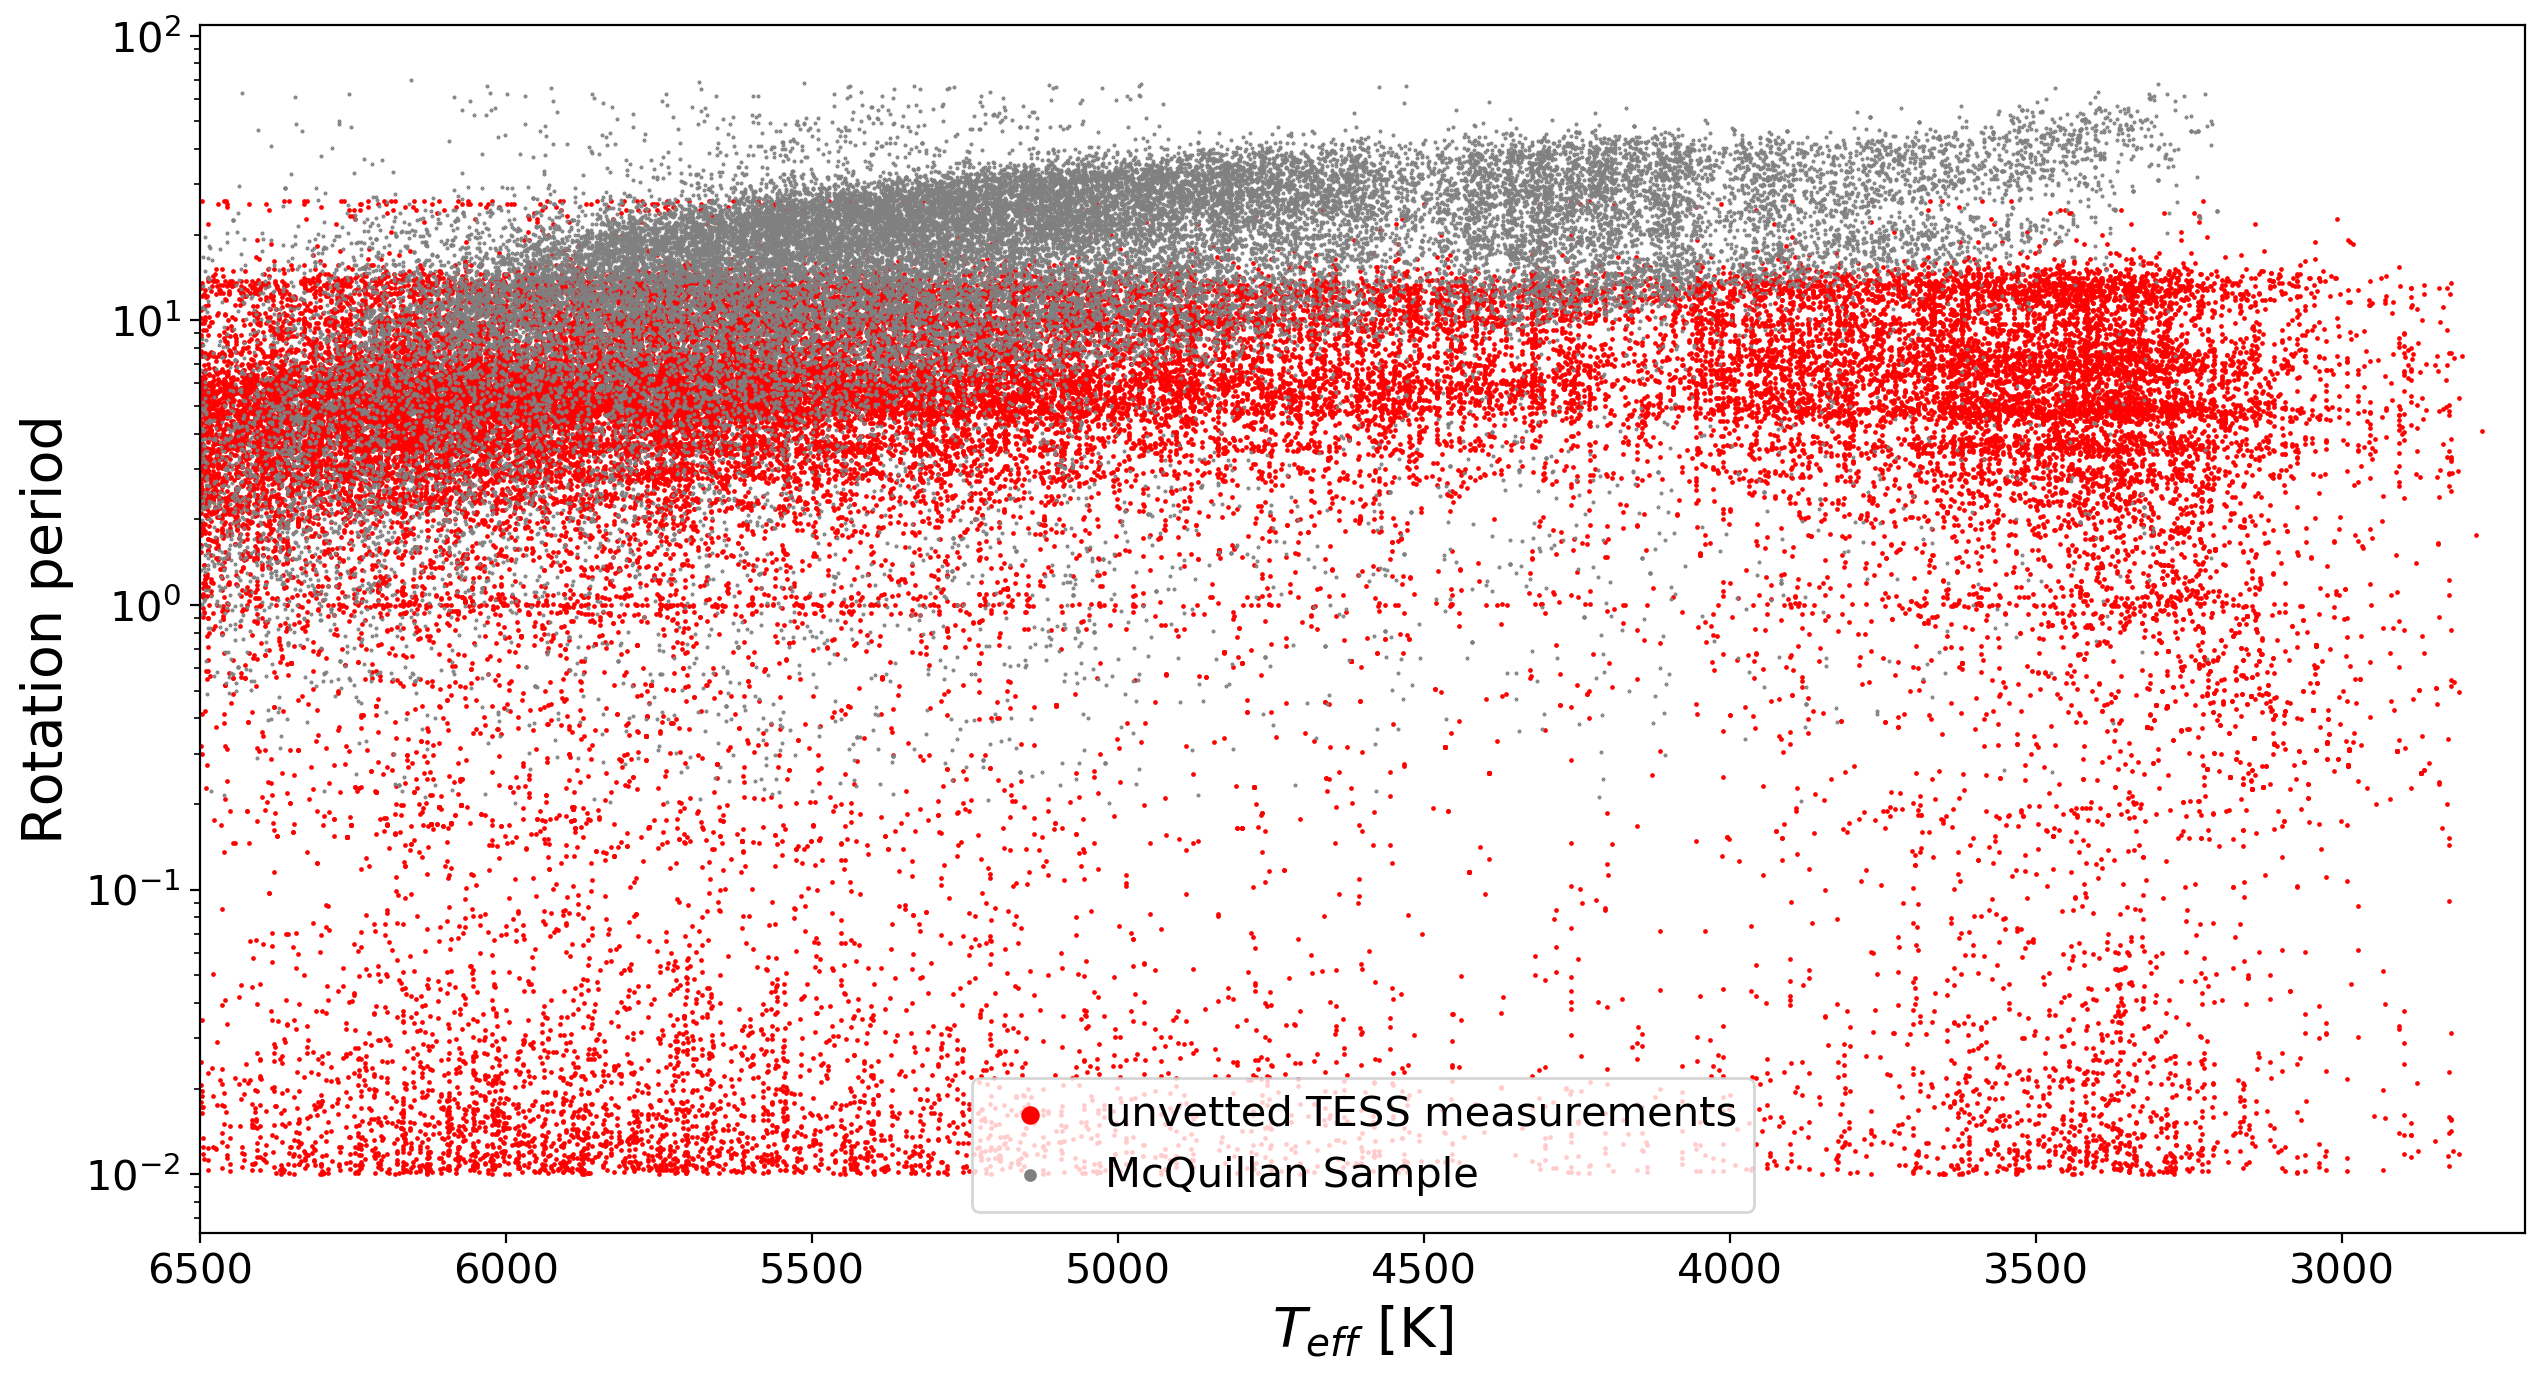

In [70]:
myys = results['ls-1'].to_numpy()
myxs = results['Teff'].to_numpy()


f =plt.figure(figsize=(15,8),dpi=200)
plt.scatter(myxs,myys,s=.5,label='unvetted TESS measurements',color='r',rasterized=True)
# plt.scatter(myxs_train,myys_train,s=.1,label='training sets',color='b',rasterized=True)
plt.scatter(mqdata['TEMP'],mqdata['ROTATION_PERIOD'].to_numpy(),color='grey',s=.2,rasterized=True,label='McQuillan Sample')


plt.legend(fontsize=15,markerscale=8)
plt.yticks(fontsize=15);plt.xticks(fontsize=15)
plt.ylabel('Rotation period',fontsize=20); plt.xlabel('$T_{eff}$ [K]',fontsize=20)
# plt.title('Original Sample',fontsize=25)
# plt.legend()
plt.yscale('log')
plt.xlim(6500,2700);

# plt.savefig('unvetted_rps.png')

In [34]:
acc

test       oob         CV  good_percent  bad_percent  good_number  \
0  0.916121  0.923043  92.327869     37.032636    62.612995        17452   
1  0.806530  0.825877  81.983071     61.345405    38.654595        10706   
2  0.760870  0.745536  75.062762     38.968803    61.031197         4172   

   nan_loss  train total  good_trainexs  bad_trainexs  
0         0     0.933537           2351           699  
1         0     0.831520           2350           958  
2         0     0.777344           1252          1138

In [35]:
# #code for trees
# from sklearn.tree import export_graphviz
# export_graphviz(tree_in_forest,
#                 feature_names=X.columns,
#                 filled=True,
#                 rounded=True)
# os.system('dot -Tpng tree.dot -o tree.png')
## or
# fn=data.feature_names
# cn=data.target_names
# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
# tree.plot_tree(rf.estimators_[0],
#                feature_names = fn, 
#                class_names=cn,
#                filled = True);
# fig.savefig('rf_individualtree.png')


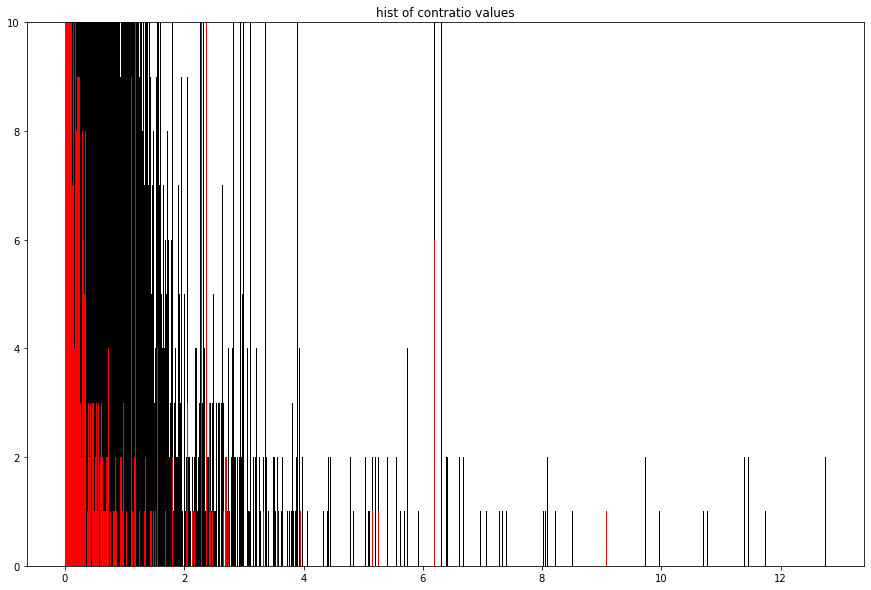

In [51]:
#check contratio distribution in good results

# list(rf3_good_unseenpredictions.columns)
goods = rf3_good_unseenpredictions['contratio'].to_numpy()
alls = results['contratio'].to_numpy()
mybins=1000
plt.figure(figsize=(10,4))
plt.hist(goods,bins=mybins,color='r',label='good out pipeline',zorder=1)
plt.hist(alls,bins=mybins,color='k',label='all values',zorder=0)
plt.title('hist of contratio values')
plt.ylim(0,10);

In [52]:
goodscontam = rf3_good_unseenpredictions[rf3_good_unseenpredictions['contratio']>4]
goodscontam


Unnamed: 0         TIC Sector      rvar      ls-1      ls-2       ls-3  \
4342         4342   198235884     16  0.049598  3.205766  7.407313   1.953637   
4344         4344   198235884     18  0.070772  3.125634  3.832059   8.474013   
4345         4345   198235884     19  0.040634  3.311899  4.902517   0.580575   
4346         4346   198235884     20  0.041997  2.273286  1.471009   3.817436   
4349         4349   198235884     23  0.046146  5.236108  1.669910   7.352868   
4351         4351   198235884     25  0.042961  3.448920  1.695381   1.024907   
19043       19043   389917321     15  0.032315  4.464891  3.597767   2.016651   
22353       22353    59525277     14  0.604373  3.718116  8.927774  18.171725   
26107       26107   184555182     14  0.175831  4.464891  7.142861  15.866048   
31446       31446   259270396     14  0.151995  1.869657  1.695381   2.083866   
39824       39824   269119490     15  0.048386  6.211475  2.398656   1.501929   
40291       40291   298163080     15  0.077132  4.902517  3.968891   2.155715   
41401       41401   419798509     15  0.039389  4.405896  3.175240   2.755432   
41796       41796  1102311836     15  0.038079  4.651749  3.637008   6.536151   

        lsamp-1   lsamp-2   lsamp-3  ...  e_RA_orig  e_Dec_orig  raddflag  \
4342   0.036596  0.025901  0.022146  ...   0.047473    0.054299         1   
4344   0.101250  0.070907  0.054562  ...   0.047473    0.054299         1   
4345   0.034136  0.017379  0.016853  ...   0.047473    0.054299         1   
4346   0.018579  0.018178  0.017762  ...   0.047473    0.054299         1   
4349   0.037386  0.018444  0.013411  ...   0.047473    0.054299         1   
4351   0.015357  0.014494  0.013420  ...   0.047473    0.054299         1   
19043  0.043619  0.034577  0.021541  ...   0.029769    0.030889         1   
22353  0.096143  0.086052  0.073111  ...   0.052913    0.063020         1   
26107  0.101921  0.062922  0.055256  ...   0.036601    0.033052         1   
31446  0.171866  0.015070  0.013078  ...   0.035009    0.039988         1   
39824  0.035865  0.033648  0.022676  ...   0.019959    0.025862         1   
40291  0.533609  0.323793  0.143716  ...   0.023919    0.023258         1   
41401  0.018621  0.017899  0.013801  ...   0.015663    0.020186         1   
41796  0.557946  0.172341  0.064932  ...   0.035921    0.023453         1   

       wdflag      objID  ID    random RF1predict_class RF2predict_class  \
4342        0  161783243 NaN  0.234429              1.0              1.0   
4344        0  161783243 NaN  0.557852              1.0              1.0   
4345        0  161783243 NaN  0.779417              1.0              1.0   
4346        0  161783243 NaN  0.719699              1.0              1.0   
4349        0  161783243 NaN  0.538013              1.0              1.0   
4351        0  161783243 NaN  0.894670              1.0              1.0   
19043       0  195105559 NaN  0.410563              1.0              1.0   
22353       0  342941118 NaN  0.127028              1.0              1.0   
26107       0  336015360 NaN  0.444295              1.0              1.0   
31446       0  304206367 NaN  0.267098              1.0              1.0   
39824       0  365664971 NaN  0.518904              1.0              1.0   
40291       0  152132033 NaN  0.663702              1.0              1.0   
41401       0  460269784 NaN  0.454957              1.0              1.0   
41796       0  153327121 NaN  0.463165              1.0              1.0   

      RF3predict_class  
4342                 3  
4344                 3  
4345                 3  
4346                 3  
4349                 3  
4351                 3  
19043                3  
22353                3  
26107                3  
31446                3  
39824                3  
40291                3  
41401                3  
41796                3  

[14 rows x 144 columns]

# plots for final presentation

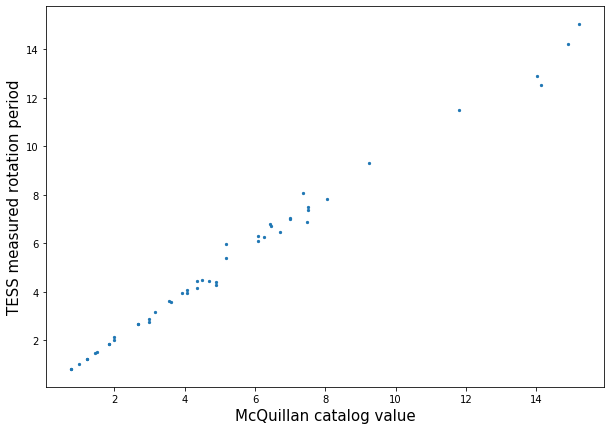

In [90]:
# rf3_final_goods = rf3_final[rf3_final['Label']==3] #find only the training ones, this is all of them

# trainrf3 = pd.read_csv('/Volumes/Seagate-stars/Final_Run/test_sets/rf3_training.csv')
# plt.figure(figsize=(10,7))
# plt.scatter(rf3_final_goods['MQ_Prot'], rf3_final_goods['ls-1'],s=5)
# plt.xlabel('McQuillan catalog value',fontsize=15)
# plt.ylabel('TESS measured rotation period',fontsize=15);

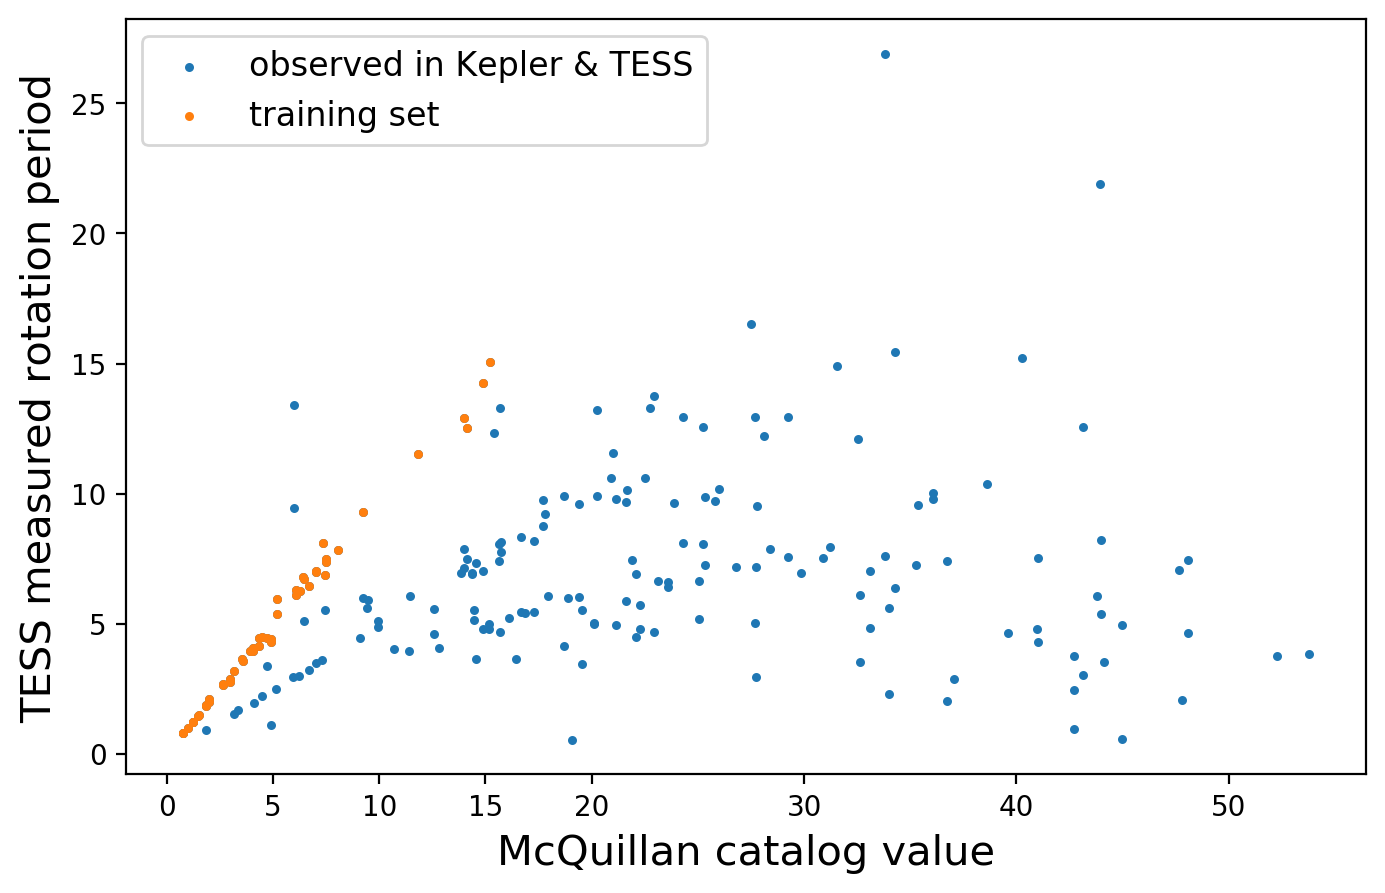

In [98]:
#import useful_functions as uf
# uf.rf3_label_meanings(3)
# len(rf3_final_goods)

# rf3_final_goods = rf3_final[rf3_final['Label']==3] #find only the training ones, this is all of them

# trainrf3 = pd.read_csv('/Volumes/Seagate-stars/Final_Run/test_sets/rf3_training.csv')
# plt.figure(figsize=(8,5),dpi=200)
# plt.scatter(rf3_final['MQ_Prot'], rf3_final['ls-1'],s=5,label='observed in Kepler & TESS')


# plt.scatter(rf3_final_goods['MQ_Prot'], rf3_final_goods['ls-1'],s=5,label='training set')
# plt.xlabel('McQuillan catalog value',fontsize=15)
# plt.legend(fontsize='large')
# plt.ylabel('TESS measured rotation period',fontsize=15);
# plt.xticks(ticks=([0, 5, 10, 15, 20, 30, 40, 50]),
#            labels=['0', '5', '10', '15', '20',
#                    '30','40','50']);
# plt.savefig('rf3_mq_training.png')

# removing some training examples

In [24]:
#find examples

# train sets
rf1_final = pd.read_csv('/Volumes/Seagate-stars/Final_Run/test_sets/rf1_training.csv')
rf2_final = pd.read_csv('/Volumes/Seagate-stars/Final_Run/test_sets/rf2_training.csv')
rf3_final = pd.read_csv('/Volumes/Seagate-stars/Final_Run/test_sets/rf3_training.csv')

#remove training sets to get unseen results
tic1 = rf1_final['TIC'].unique()
tic2 = rf2_final['TIC'].unique()
tic3 = rf3_final['TIC'].unique()
alltics = np.concatenate([tic1,tic2,tic3])
traintics = np.unique(alltics)
#see if results are in tics
mask = [np.isin(results['TIC'].iloc[i],traintics)==True for i in range(len(results))]
not_mask = np.logical_not(mask) #b/c ~ wont work with T/F
train_results = results[mask]
unseen_results =results[not_mask]

# #full training set results
# RF3_master_data = unseen_results
# rf1_goodcut = (RF3_master_data['RF1predict_class']==1.0) #periodic
# rf2_goodcut = (RF3_master_data['RF2predict_class']==1.0) #no transit
# rf3_goodcut = (RF3_master_data['RF3predict_class']==3.0) #good Prot
# rf3_badcut = (RF3_master_data['RF3predict_class']==1.0) #bad Prot
# rf3_good_unseenpredictions = RF3_master_data[rf1_goodcut & rf2_goodcut & rf3_goodcut] #passed RF 1&2&3
# ## final good plot
# myxs_unseen = rf3_good_unseenpredictions['Teff'].to_numpy()
# myys_unseen = rf3_good_unseenpredictions['ls-1'].to_numpy()

#only training set expected to be predicted good
RF3_master_data = train_results
rf1_goodcut = (RF3_master_data['RF1predict_class']==1.0) #periodic
rf2_goodcut = (RF3_master_data['RF2predict_class']==1.0) #no transit
rf3_goodcut = (RF3_master_data['RF3predict_class']==3.0) #good Prot
rf3_badcut = (RF3_master_data['RF3predict_class']==1.0) #bad Prot
rf3_good_trainpredictions = RF3_master_data[rf1_goodcut & rf2_goodcut & rf3_goodcut] #passed RF 1&2&3
## final good plot
myxs_train = rf3_good_trainpredictions['Teff'].to_numpy()
myys_train = rf3_good_trainpredictions['ls-1'].to_numpy()

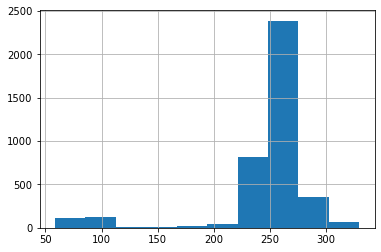

In [25]:
train_results['RA_orig'].hist()

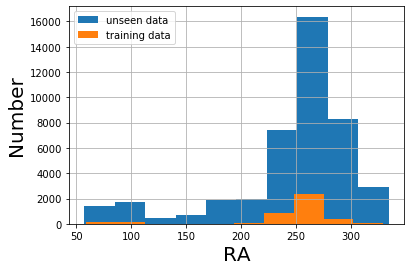

In [29]:
unseen_results['RA_orig'].hist(label='unseen data')
train_results['RA_orig'].hist(label='training data')
plt.xlabel('RA',fontsize=20);plt.ylabel('Number',fontsize=20)
plt.legend();

In [45]:
allstats = pd.read_csv('/Volumes/Seagate-stars/Final_Run/test_sets/master_df.csv')#includes ncvz google df & tois in rf2

len(unseen_results),len(train_results), len(allstats), len(unseen_results)+len(train_results)

/Users/helenfellow/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (2,99) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(43185, 3941, 47126, 47126)

In [43]:
unseen_results['Sector'].unique() #all Norht sectors plus both cvz stitched -- should only be 14/15

south = unseen_results[unseen_results['Sector']=='SCVZ-stitched']
# proved southcvz are not in train sets - should remove
north = unseen_results[unseen_results['Sector']=='NCVZ-stitched']
# proved northcvz are not in train sets - should remove
nsecs = np.arange(16,27,1)
northsecs = unseen_results[np.isin(unseen_results['Sector'], nsecs)==True]
# proved northsecs are not in train sets - shoudl remove


Unnamed: 0        TIC Sector      rvar       ls-1      ls-2      ls-3  \
1               1  272783172     16  0.000768   2.208056  4.566805  1.919892   
2               2  272783172     17  0.000778   5.291502  3.832059  1.783014   
3               3  272783172     18  0.000773   2.950477  3.637008  2.237691   
4               4  272783172     19  0.000809   5.155158  3.704348  8.264001   
5               5  272783172     20  0.000888   5.319641  3.300971  7.812241   
...           ...        ...    ...       ...        ...       ...       ...   
18614       18614  229582970     21  0.009408  14.079592  6.849420  0.911864   
18615       18615  229582970     22  0.011012   9.998567  4.808261  6.451841   
18616       18616  229582970     23  0.010763   4.762479  0.011505  2.488147   
18617       18617  229582970     24  0.011281   4.405896  1.764147  1.179600   
18618       18618  229582970     25  0.010204   9.008167  3.356347  0.010488   

        lsamp-1   lsamp-2   lsamp-3  ...  e_RA_orig  e_Dec_orig  raddflag  \
1      0.096460  0.055558  0.034327  ...   0.023851    0.019087         1   
2      0.037151  0.030448  0.029720  ...   0.023851    0.019087         1   
3      0.131685  0.092464  0.068759  ...   0.023851    0.019087         1   
4      0.119614  0.048511  0.037113  ...   0.023851    0.019087         1   
5      0.106104  0.077728  0.049993  ...   0.023851    0.019087         1   
...         ...       ...       ...  ...        ...         ...       ...   
18614  0.003812  0.002555  0.001716  ...   0.028037    0.034549         1   
18615  0.062860  0.046964  0.024856  ...   0.028037    0.034549         1   
18616  0.001440  0.001270  0.001202  ...   0.028037    0.034549         1   
18617  0.003216  0.001634  0.001269  ...   0.028037    0.034549         1   
18618  0.002464  0.001136  0.001050  ...   0.028037    0.034549         1   

       wdflag      objID  ID    random RF1predict_class RF2predict_class  \
1           0  157380305 NaN  0.019475              1.0              1.0   
2           0  157380305 NaN  0.463219              1.0              1.0   
3           0  157380305 NaN  0.724934              1.0              1.0   
4           0  157380305 NaN  0.420204              1.0              1.0   
5           0  157380305 NaN  0.485427              1.0              1.0   
...       ...        ...  ..       ...              ...              ...   
18614       0  182594014 NaN  0.002592              5.0              1.0   
18615       0  182594014 NaN  0.019352              1.0              1.0   
18616       0  182594014 NaN  0.307762              5.0              1.0   
18617       0  182594014 NaN  0.662599              5.0              1.0   
18618       0  182594014 NaN  0.828443              5.0              1.0   

      RF3predict_class  
1                  3.0  
2                  1.0  
3                  3.0  
4                  1.0  
5                  1.0  
...                ...  
18614              1.0  
18615              1.0  
18616              1.0  
18617              1.0  
18618              1.0  

[13420 rows x 144 columns]

In [44]:
tic = 32050414
for count,tic in enumerate(northsecs['TIC'].to_numpy()):
    one = rf1_final[rf1_final['TIC']==tic]
    two = rf2_final[rf2_final['TIC']==tic]
    three = rf3_final[rf3_final['TIC']==tic]
    if len(one)>0:
        print('one',one)
    if len(two)>0:
        print('two',two)
    if len(three)>0:
        print('three',three)
    else:
        print(count,'all empty')

0 all empty
1 all empty
2 all empty
3 all empty
4 all empty
5 all empty
6 all empty
7 all empty
8 all empty
9 all empty
10 all empty
11 all empty
12 all empty
13 all empty
14 all empty
15 all empty
16 all empty
17 all empty
18 all empty
19 all empty
20 all empty
21 all empty
22 all empty
23 all empty
24 all empty
25 all empty
26 all empty
27 all empty
28 all empty
29 all empty
30 all empty
31 all empty
32 all empty
33 all empty
34 all empty
35 all empty
36 all empty
37 all empty
38 all empty
39 all empty
40 all empty
41 all empty
42 all empty
43 all empty
44 all empty
45 all empty
46 all empty
47 all empty
48 all empty
49 all empty
50 all empty
51 all empty
52 all empty
53 all empty
54 all empty
55 all empty
56 all empty
57 all empty
58 all empty
59 all empty
60 all empty
61 all empty
62 all empty
63 all empty
64 all empty
65 all empty
66 all empty
67 all empty
68 all empty
69 all empty
70 all empty
71 all empty
72 all empty
73 all empty
74 all empty
75 all empty
76 all empty
77 all em

621 all empty
622 all empty
623 all empty
624 all empty
625 all empty
626 all empty
627 all empty
628 all empty
629 all empty
630 all empty
631 all empty
632 all empty
633 all empty
634 all empty
635 all empty
636 all empty
637 all empty
638 all empty
639 all empty
640 all empty
641 all empty
642 all empty
643 all empty
644 all empty
645 all empty
646 all empty
647 all empty
648 all empty
649 all empty
650 all empty
651 all empty
652 all empty
653 all empty
654 all empty
655 all empty
656 all empty
657 all empty
658 all empty
659 all empty
660 all empty
661 all empty
662 all empty
663 all empty
664 all empty
665 all empty
666 all empty
667 all empty
668 all empty
669 all empty
670 all empty
671 all empty
672 all empty
673 all empty
674 all empty
675 all empty
676 all empty
677 all empty
678 all empty
679 all empty
680 all empty
681 all empty
682 all empty
683 all empty
684 all empty
685 all empty
686 all empty
687 all empty
688 all empty
689 all empty
690 all empty
691 all empty
692 al

1279 all empty
1280 all empty
1281 all empty
1282 all empty
1283 all empty
1284 all empty
1285 all empty
1286 all empty
1287 all empty
1288 all empty
1289 all empty
1290 all empty
1291 all empty
1292 all empty
1293 all empty
1294 all empty
1295 all empty
1296 all empty
1297 all empty
1298 all empty
1299 all empty
1300 all empty
1301 all empty
1302 all empty
1303 all empty
1304 all empty
1305 all empty
1306 all empty
1307 all empty
1308 all empty
1309 all empty
1310 all empty
1311 all empty
1312 all empty
1313 all empty
1314 all empty
1315 all empty
1316 all empty
1317 all empty
1318 all empty
1319 all empty
1320 all empty
1321 all empty
1322 all empty
1323 all empty
1324 all empty
1325 all empty
1326 all empty
1327 all empty
1328 all empty
1329 all empty
1330 all empty
1331 all empty
1332 all empty
1333 all empty
1334 all empty
1335 all empty
1336 all empty
1337 all empty
1338 all empty
1339 all empty
1340 all empty
1341 all empty
1342 all empty
1343 all empty
1344 all empty
1345 all e

1897 all empty
1898 all empty
1899 all empty
1900 all empty
1901 all empty
1902 all empty
1903 all empty
1904 all empty
1905 all empty
1906 all empty
1907 all empty
1908 all empty
1909 all empty
1910 all empty
1911 all empty
1912 all empty
1913 all empty
1914 all empty
1915 all empty
1916 all empty
1917 all empty
1918 all empty
1919 all empty
1920 all empty
1921 all empty
1922 all empty
1923 all empty
1924 all empty
1925 all empty
1926 all empty
1927 all empty
1928 all empty
1929 all empty
1930 all empty
1931 all empty
1932 all empty
1933 all empty
1934 all empty
1935 all empty
1936 all empty
1937 all empty
1938 all empty
1939 all empty
1940 all empty
1941 all empty
1942 all empty
1943 all empty
1944 all empty
1945 all empty
1946 all empty
1947 all empty
1948 all empty
1949 all empty
1950 all empty
1951 all empty
1952 all empty
1953 all empty
1954 all empty
1955 all empty
1956 all empty
1957 all empty
1958 all empty
1959 all empty
1960 all empty
1961 all empty
1962 all empty
1963 all e

2510 all empty
2511 all empty
2512 all empty
2513 all empty
2514 all empty
2515 all empty
2516 all empty
2517 all empty
2518 all empty
2519 all empty
2520 all empty
2521 all empty
2522 all empty
2523 all empty
2524 all empty
2525 all empty
2526 all empty
2527 all empty
2528 all empty
2529 all empty
2530 all empty
2531 all empty
2532 all empty
2533 all empty
2534 all empty
2535 all empty
2536 all empty
2537 all empty
2538 all empty
2539 all empty
2540 all empty
2541 all empty
2542 all empty
2543 all empty
2544 all empty
2545 all empty
2546 all empty
2547 all empty
2548 all empty
2549 all empty
2550 all empty
2551 all empty
2552 all empty
2553 all empty
2554 all empty
2555 all empty
2556 all empty
2557 all empty
2558 all empty
2559 all empty
2560 all empty
2561 all empty
2562 all empty
2563 all empty
2564 all empty
2565 all empty
2566 all empty
2567 all empty
2568 all empty
2569 all empty
2570 all empty
2571 all empty
2572 all empty
2573 all empty
2574 all empty
2575 all empty
2576 all e

3161 all empty
3162 all empty
3163 all empty
3164 all empty
3165 all empty
3166 all empty
3167 all empty
3168 all empty
3169 all empty
3170 all empty
3171 all empty
3172 all empty
3173 all empty
3174 all empty
3175 all empty
3176 all empty
3177 all empty
3178 all empty
3179 all empty
3180 all empty
3181 all empty
3182 all empty
3183 all empty
3184 all empty
3185 all empty
3186 all empty
3187 all empty
3188 all empty
3189 all empty
3190 all empty
3191 all empty
3192 all empty
3193 all empty
3194 all empty
3195 all empty
3196 all empty
3197 all empty
3198 all empty
3199 all empty
3200 all empty
3201 all empty
3202 all empty
3203 all empty
3204 all empty
3205 all empty
3206 all empty
3207 all empty
3208 all empty
3209 all empty
3210 all empty
3211 all empty
3212 all empty
3213 all empty
3214 all empty
3215 all empty
3216 all empty
3217 all empty
3218 all empty
3219 all empty
3220 all empty
3221 all empty
3222 all empty
3223 all empty
3224 all empty
3225 all empty
3226 all empty
3227 all e

3789 all empty
3790 all empty
3791 all empty
3792 all empty
3793 all empty
3794 all empty
3795 all empty
3796 all empty
3797 all empty
3798 all empty
3799 all empty
3800 all empty
3801 all empty
3802 all empty
3803 all empty
3804 all empty
3805 all empty
3806 all empty
3807 all empty
3808 all empty
3809 all empty
3810 all empty
3811 all empty
3812 all empty
3813 all empty
3814 all empty
3815 all empty
3816 all empty
3817 all empty
3818 all empty
3819 all empty
3820 all empty
3821 all empty
3822 all empty
3823 all empty
3824 all empty
3825 all empty
3826 all empty
3827 all empty
3828 all empty
3829 all empty
3830 all empty
3831 all empty
3832 all empty
3833 all empty
3834 all empty
3835 all empty
3836 all empty
3837 all empty
3838 all empty
3839 all empty
3840 all empty
3841 all empty
3842 all empty
3843 all empty
3844 all empty
3845 all empty
3846 all empty
3847 all empty
3848 all empty
3849 all empty
3850 all empty
3851 all empty
3852 all empty
3853 all empty
3854 all empty
3855 all e

4408 all empty
4409 all empty
4410 all empty
4411 all empty
4412 all empty
4413 all empty
4414 all empty
4415 all empty
4416 all empty
4417 all empty
4418 all empty
4419 all empty
4420 all empty
4421 all empty
4422 all empty
4423 all empty
4424 all empty
4425 all empty
4426 all empty
4427 all empty
4428 all empty
4429 all empty
4430 all empty
4431 all empty
4432 all empty
4433 all empty
4434 all empty
4435 all empty
4436 all empty
4437 all empty
4438 all empty
4439 all empty
4440 all empty
4441 all empty
4442 all empty
4443 all empty
4444 all empty
4445 all empty
4446 all empty
4447 all empty
4448 all empty
4449 all empty
4450 all empty
4451 all empty
4452 all empty
4453 all empty
4454 all empty
4455 all empty
4456 all empty
4457 all empty
4458 all empty
4459 all empty
4460 all empty
4461 all empty
4462 all empty
4463 all empty
4464 all empty
4465 all empty
4466 all empty
4467 all empty
4468 all empty
4469 all empty
4470 all empty
4471 all empty
4472 all empty
4473 all empty
4474 all e

4997 all empty
4998 all empty
4999 all empty
5000 all empty
5001 all empty
5002 all empty
5003 all empty
5004 all empty
5005 all empty
5006 all empty
5007 all empty
5008 all empty
5009 all empty
5010 all empty
5011 all empty
5012 all empty
5013 all empty
5014 all empty
5015 all empty
5016 all empty
5017 all empty
5018 all empty
5019 all empty
5020 all empty
5021 all empty
5022 all empty
5023 all empty
5024 all empty
5025 all empty
5026 all empty
5027 all empty
5028 all empty
5029 all empty
5030 all empty
5031 all empty
5032 all empty
5033 all empty
5034 all empty
5035 all empty
5036 all empty
5037 all empty
5038 all empty
5039 all empty
5040 all empty
5041 all empty
5042 all empty
5043 all empty
5044 all empty
5045 all empty
5046 all empty
5047 all empty
5048 all empty
5049 all empty
5050 all empty
5051 all empty
5052 all empty
5053 all empty
5054 all empty
5055 all empty
5056 all empty
5057 all empty
5058 all empty
5059 all empty
5060 all empty
5061 all empty
5062 all empty
5063 all e

5572 all empty
5573 all empty
5574 all empty
5575 all empty
5576 all empty
5577 all empty
5578 all empty
5579 all empty
5580 all empty
5581 all empty
5582 all empty
5583 all empty
5584 all empty
5585 all empty
5586 all empty
5587 all empty
5588 all empty
5589 all empty
5590 all empty
5591 all empty
5592 all empty
5593 all empty
5594 all empty
5595 all empty
5596 all empty
5597 all empty
5598 all empty
5599 all empty
5600 all empty
5601 all empty
5602 all empty
5603 all empty
5604 all empty
5605 all empty
5606 all empty
5607 all empty
5608 all empty
5609 all empty
5610 all empty
5611 all empty
5612 all empty
5613 all empty
5614 all empty
5615 all empty
5616 all empty
5617 all empty
5618 all empty
5619 all empty
5620 all empty
5621 all empty
5622 all empty
5623 all empty
5624 all empty
5625 all empty
5626 all empty
5627 all empty
5628 all empty
5629 all empty
5630 all empty
5631 all empty
5632 all empty
5633 all empty
5634 all empty
5635 all empty
5636 all empty
5637 all empty
5638 all e

6179 all empty
6180 all empty
6181 all empty
6182 all empty
6183 all empty
6184 all empty
6185 all empty
6186 all empty
6187 all empty
6188 all empty
6189 all empty
6190 all empty
6191 all empty
6192 all empty
6193 all empty
6194 all empty
6195 all empty
6196 all empty
6197 all empty
6198 all empty
6199 all empty
6200 all empty
6201 all empty
6202 all empty
6203 all empty
6204 all empty
6205 all empty
6206 all empty
6207 all empty
6208 all empty
6209 all empty
6210 all empty
6211 all empty
6212 all empty
6213 all empty
6214 all empty
6215 all empty
6216 all empty
6217 all empty
6218 all empty
6219 all empty
6220 all empty
6221 all empty
6222 all empty
6223 all empty
6224 all empty
6225 all empty
6226 all empty
6227 all empty
6228 all empty
6229 all empty
6230 all empty
6231 all empty
6232 all empty
6233 all empty
6234 all empty
6235 all empty
6236 all empty
6237 all empty
6238 all empty
6239 all empty
6240 all empty
6241 all empty
6242 all empty
6243 all empty
6244 all empty
6245 all e

6797 all empty
6798 all empty
6799 all empty
6800 all empty
6801 all empty
6802 all empty
6803 all empty
6804 all empty
6805 all empty
6806 all empty
6807 all empty
6808 all empty
6809 all empty
6810 all empty
6811 all empty
6812 all empty
6813 all empty
6814 all empty
6815 all empty
6816 all empty
6817 all empty
6818 all empty
6819 all empty
6820 all empty
6821 all empty
6822 all empty
6823 all empty
6824 all empty
6825 all empty
6826 all empty
6827 all empty
6828 all empty
6829 all empty
6830 all empty
6831 all empty
6832 all empty
6833 all empty
6834 all empty
6835 all empty
6836 all empty
6837 all empty
6838 all empty
6839 all empty
6840 all empty
6841 all empty
6842 all empty
6843 all empty
6844 all empty
6845 all empty
6846 all empty
6847 all empty
6848 all empty
6849 all empty
6850 all empty
6851 all empty
6852 all empty
6853 all empty
6854 all empty
6855 all empty
6856 all empty
6857 all empty
6858 all empty
6859 all empty
6860 all empty
6861 all empty
6862 all empty
6863 all e

7403 all empty
7404 all empty
7405 all empty
7406 all empty
7407 all empty
7408 all empty
7409 all empty
7410 all empty
7411 all empty
7412 all empty
7413 all empty
7414 all empty
7415 all empty
7416 all empty
7417 all empty
7418 all empty
7419 all empty
7420 all empty
7421 all empty
7422 all empty
7423 all empty
7424 all empty
7425 all empty
7426 all empty
7427 all empty
7428 all empty
7429 all empty
7430 all empty
7431 all empty
7432 all empty
7433 all empty
7434 all empty
7435 all empty
7436 all empty
7437 all empty
7438 all empty
7439 all empty
7440 all empty
7441 all empty
7442 all empty
7443 all empty
7444 all empty
7445 all empty
7446 all empty
7447 all empty
7448 all empty
7449 all empty
7450 all empty
7451 all empty
7452 all empty
7453 all empty
7454 all empty
7455 all empty
7456 all empty
7457 all empty
7458 all empty
7459 all empty
7460 all empty
7461 all empty
7462 all empty
7463 all empty
7464 all empty
7465 all empty
7466 all empty
7467 all empty
7468 all empty
7469 all e

7992 all empty
7993 all empty
7994 all empty
7995 all empty
7996 all empty
7997 all empty
7998 all empty
7999 all empty
8000 all empty
8001 all empty
8002 all empty
8003 all empty
8004 all empty
8005 all empty
8006 all empty
8007 all empty
8008 all empty
8009 all empty
8010 all empty
8011 all empty
8012 all empty
8013 all empty
8014 all empty
8015 all empty
8016 all empty
8017 all empty
8018 all empty
8019 all empty
8020 all empty
8021 all empty
8022 all empty
8023 all empty
8024 all empty
8025 all empty
8026 all empty
8027 all empty
8028 all empty
8029 all empty
8030 all empty
8031 all empty
8032 all empty
8033 all empty
8034 all empty
8035 all empty
8036 all empty
8037 all empty
8038 all empty
8039 all empty
8040 all empty
8041 all empty
8042 all empty
8043 all empty
8044 all empty
8045 all empty
8046 all empty
8047 all empty
8048 all empty
8049 all empty
8050 all empty
8051 all empty
8052 all empty
8053 all empty
8054 all empty
8055 all empty
8056 all empty
8057 all empty
8058 all e

8645 all empty
8646 all empty
8647 all empty
8648 all empty
8649 all empty
8650 all empty
8651 all empty
8652 all empty
8653 all empty
8654 all empty
8655 all empty
8656 all empty
8657 all empty
8658 all empty
8659 all empty
8660 all empty
8661 all empty
8662 all empty
8663 all empty
8664 all empty
8665 all empty
8666 all empty
8667 all empty
8668 all empty
8669 all empty
8670 all empty
8671 all empty
8672 all empty
8673 all empty
8674 all empty
8675 all empty
8676 all empty
8677 all empty
8678 all empty
8679 all empty
8680 all empty
8681 all empty
8682 all empty
8683 all empty
8684 all empty
8685 all empty
8686 all empty
8687 all empty
8688 all empty
8689 all empty
8690 all empty
8691 all empty
8692 all empty
8693 all empty
8694 all empty
8695 all empty
8696 all empty
8697 all empty
8698 all empty
8699 all empty
8700 all empty
8701 all empty
8702 all empty
8703 all empty
8704 all empty
8705 all empty
8706 all empty
8707 all empty
8708 all empty
8709 all empty
8710 all empty
8711 all e

9203 all empty
9204 all empty
9205 all empty
9206 all empty
9207 all empty
9208 all empty
9209 all empty
9210 all empty
9211 all empty
9212 all empty
9213 all empty
9214 all empty
9215 all empty
9216 all empty
9217 all empty
9218 all empty
9219 all empty
9220 all empty
9221 all empty
9222 all empty
9223 all empty
9224 all empty
9225 all empty
9226 all empty
9227 all empty
9228 all empty
9229 all empty
9230 all empty
9231 all empty
9232 all empty
9233 all empty
9234 all empty
9235 all empty
9236 all empty
9237 all empty
9238 all empty
9239 all empty
9240 all empty
9241 all empty
9242 all empty
9243 all empty
9244 all empty
9245 all empty
9246 all empty
9247 all empty
9248 all empty
9249 all empty
9250 all empty
9251 all empty
9252 all empty
9253 all empty
9254 all empty
9255 all empty
9256 all empty
9257 all empty
9258 all empty
9259 all empty
9260 all empty
9261 all empty
9262 all empty
9263 all empty
9264 all empty
9265 all empty
9266 all empty
9267 all empty
9268 all empty
9269 all e

9753 all empty
9754 all empty
9755 all empty
9756 all empty
9757 all empty
9758 all empty
9759 all empty
9760 all empty
9761 all empty
9762 all empty
9763 all empty
9764 all empty
9765 all empty
9766 all empty
9767 all empty
9768 all empty
9769 all empty
9770 all empty
9771 all empty
9772 all empty
9773 all empty
9774 all empty
9775 all empty
9776 all empty
9777 all empty
9778 all empty
9779 all empty
9780 all empty
9781 all empty
9782 all empty
9783 all empty
9784 all empty
9785 all empty
9786 all empty
9787 all empty
9788 all empty
9789 all empty
9790 all empty
9791 all empty
9792 all empty
9793 all empty
9794 all empty
9795 all empty
9796 all empty
9797 all empty
9798 all empty
9799 all empty
9800 all empty
9801 all empty
9802 all empty
9803 all empty
9804 all empty
9805 all empty
9806 all empty
9807 all empty
9808 all empty
9809 all empty
9810 all empty
9811 all empty
9812 all empty
9813 all empty
9814 all empty
9815 all empty
9816 all empty
9817 all empty
9818 all empty
9819 all e

10317 all empty
10318 all empty
10319 all empty
10320 all empty
10321 all empty
10322 all empty
10323 all empty
10324 all empty
10325 all empty
10326 all empty
10327 all empty
10328 all empty
10329 all empty
10330 all empty
10331 all empty
10332 all empty
10333 all empty
10334 all empty
10335 all empty
10336 all empty
10337 all empty
10338 all empty
10339 all empty
10340 all empty
10341 all empty
10342 all empty
10343 all empty
10344 all empty
10345 all empty
10346 all empty
10347 all empty
10348 all empty
10349 all empty
10350 all empty
10351 all empty
10352 all empty
10353 all empty
10354 all empty
10355 all empty
10356 all empty
10357 all empty
10358 all empty
10359 all empty
10360 all empty
10361 all empty
10362 all empty
10363 all empty
10364 all empty
10365 all empty
10366 all empty
10367 all empty
10368 all empty
10369 all empty
10370 all empty
10371 all empty
10372 all empty
10373 all empty
10374 all empty
10375 all empty
10376 all empty
10377 all empty
10378 all empty
10379 al

10916 all empty
10917 all empty
10918 all empty
10919 all empty
10920 all empty
10921 all empty
10922 all empty
10923 all empty
10924 all empty
10925 all empty
10926 all empty
10927 all empty
10928 all empty
10929 all empty
10930 all empty
10931 all empty
10932 all empty
10933 all empty
10934 all empty
10935 all empty
10936 all empty
10937 all empty
10938 all empty
10939 all empty
10940 all empty
10941 all empty
10942 all empty
10943 all empty
10944 all empty
10945 all empty
10946 all empty
10947 all empty
10948 all empty
10949 all empty
10950 all empty
10951 all empty
10952 all empty
10953 all empty
10954 all empty
10955 all empty
10956 all empty
10957 all empty
10958 all empty
10959 all empty
10960 all empty
10961 all empty
10962 all empty
10963 all empty
10964 all empty
10965 all empty
10966 all empty
10967 all empty
10968 all empty
10969 all empty
10970 all empty
10971 all empty
10972 all empty
10973 all empty
10974 all empty
10975 all empty
10976 all empty
10977 all empty
10978 al

11514 all empty
11515 all empty
11516 all empty
11517 all empty
11518 all empty
11519 all empty
11520 all empty
11521 all empty
11522 all empty
11523 all empty
11524 all empty
11525 all empty
11526 all empty
11527 all empty
11528 all empty
11529 all empty
11530 all empty
11531 all empty
11532 all empty
11533 all empty
11534 all empty
11535 all empty
11536 all empty
11537 all empty
11538 all empty
11539 all empty
11540 all empty
11541 all empty
11542 all empty
11543 all empty
11544 all empty
11545 all empty
11546 all empty
11547 all empty
11548 all empty
11549 all empty
11550 all empty
11551 all empty
11552 all empty
11553 all empty
11554 all empty
11555 all empty
11556 all empty
11557 all empty
11558 all empty
11559 all empty
11560 all empty
11561 all empty
11562 all empty
11563 all empty
11564 all empty
11565 all empty
11566 all empty
11567 all empty
11568 all empty
11569 all empty
11570 all empty
11571 all empty
11572 all empty
11573 all empty
11574 all empty
11575 all empty
11576 al

12093 all empty
12094 all empty
12095 all empty
12096 all empty
12097 all empty
12098 all empty
12099 all empty
12100 all empty
12101 all empty
12102 all empty
12103 all empty
12104 all empty
12105 all empty
12106 all empty
12107 all empty
12108 all empty
12109 all empty
12110 all empty
12111 all empty
12112 all empty
12113 all empty
12114 all empty
12115 all empty
12116 all empty
12117 all empty
12118 all empty
12119 all empty
12120 all empty
12121 all empty
12122 all empty
12123 all empty
12124 all empty
12125 all empty
12126 all empty
12127 all empty
12128 all empty
12129 all empty
12130 all empty
12131 all empty
12132 all empty
12133 all empty
12134 all empty
12135 all empty
12136 all empty
12137 all empty
12138 all empty
12139 all empty
12140 all empty
12141 all empty
12142 all empty
12143 all empty
12144 all empty
12145 all empty
12146 all empty
12147 all empty
12148 all empty
12149 all empty
12150 all empty
12151 all empty
12152 all empty
12153 all empty
12154 all empty
12155 al

12671 all empty
12672 all empty
12673 all empty
12674 all empty
12675 all empty
12676 all empty
12677 all empty
12678 all empty
12679 all empty
12680 all empty
12681 all empty
12682 all empty
12683 all empty
12684 all empty
12685 all empty
12686 all empty
12687 all empty
12688 all empty
12689 all empty
12690 all empty
12691 all empty
12692 all empty
12693 all empty
12694 all empty
12695 all empty
12696 all empty
12697 all empty
12698 all empty
12699 all empty
12700 all empty
12701 all empty
12702 all empty
12703 all empty
12704 all empty
12705 all empty
12706 all empty
12707 all empty
12708 all empty
12709 all empty
12710 all empty
12711 all empty
12712 all empty
12713 all empty
12714 all empty
12715 all empty
12716 all empty
12717 all empty
12718 all empty
12719 all empty
12720 all empty
12721 all empty
12722 all empty
12723 all empty
12724 all empty
12725 all empty
12726 all empty
12727 all empty
12728 all empty
12729 all empty
12730 all empty
12731 all empty
12732 all empty
12733 al

13249 all empty
13250 all empty
13251 all empty
13252 all empty
13253 all empty
13254 all empty
13255 all empty
13256 all empty
13257 all empty
13258 all empty
13259 all empty
13260 all empty
13261 all empty
13262 all empty
13263 all empty
13264 all empty
13265 all empty
13266 all empty
13267 all empty
13268 all empty
13269 all empty
13270 all empty
13271 all empty
13272 all empty
13273 all empty
13274 all empty
13275 all empty
13276 all empty
13277 all empty
13278 all empty
13279 all empty
13280 all empty
13281 all empty
13282 all empty
13283 all empty
13284 all empty
13285 all empty
13286 all empty
13287 all empty
13288 all empty
13289 all empty
13290 all empty
13291 all empty
13292 all empty
13293 all empty
13294 all empty
13295 all empty
13296 all empty
13297 all empty
13298 all empty
13299 all empty
13300 all empty
13301 all empty
13302 all empty
13303 all empty
13304 all empty
13305 all empty
13306 all empty
13307 all empty
13308 all empty
13309 all empty
13310 all empty
13311 al

In [ ]:
#plot good predictions
f =plt.figure(figsize=(15,8),dpi=200)
plt.scatter(mqdata['TEMP'],mqdata['ROTATION_PERIOD'].to_numpy(),color='lightgrey',s=.2,rasterized=True,label='McQuillan Sample')
plt.scatter(myxs_unseen,myys_unseen,s=.5,label='TESS sectors 14 & 15',color='r',rasterized=True)
plt.scatter(myxs_train,myys_train,s=.1,label='training sets',color='b',rasterized=True)


plt.ylabel('Rotation period',fontsize=20); plt.xlabel('$T_{eff}$ [K]',fontsize=20)
plt.title('Final GOOD Predictions',fontsize=25)
plt.legend(fontsize=15,markerscale=8)
plt.yticks(fontsize=15);plt.xticks(fontsize=15)
plt.yscale('log')
plt.xlim(6500,2700);